In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 30)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from scipy.stats import shapiro 
import phik

import warnings
warnings.filterwarnings("ignore")

# **1. Data Understanding**

Dataset berisi rekam perjalanan **Green Taxi** pada bulan **Januari 2023** yang dipublikasikan oleh **New York City (NYC) Taxi & Limousine Commission (TLC)** (https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). Pemahaman dataset akan ditinjau dari segi: **tipe data**, **statistik deskriptif**, **duplikasi data**, **missing values**, dan **outliers**.

## **1.1 Data Types**

In [2]:
def skim_dtype(df):
    df_info = pd.DataFrame({
        'attribute': df.columns.values,
        'data_type': df.dtypes.values,
        'n_unique': df.nunique().values,
        'sample_unique': [df[col].unique() for col in df.columns.values]
    }).reset_index(drop=True)
    print(f'rows, columns: {df.shape[0]}, {df.shape[1]}')
    return df_info

In [3]:
df = pd.read_csv('../data/raw/NYC_TLC_Trip_Record.csv')
skim_dtype(df)

rows, columns: 68211, 20


,attribute,data_type,n_unique,sample_unique
0,VendorID,int64,2,"[2, 1]"
1,lpep_pickup_datetime,object,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-0..."
2,lpep_dropoff_datetime,object,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-0..."
3,store_and_fwd_flag,object,2,"[N, Y, nan]"
4,RatecodeID,float64,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,int64,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, 97, 7, 42, 95, 260, 134, 130, 258, 129, 116, 92, 65, 74, 17, 152, 210, 112, 69, 243, 82, 179, 168, 80, 25, 145, 264, 33, 226, 52, 169, 36, 51, 157, 43..."
6,DOLocationID,int64,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140, 234, 148, 255, 186, 210, 129, 68, 260, 42, 24, 244, 146, 135, 173, 216, 142, 265, 164, 7, 83, 95, 130, 223, 80, 48, 263, 196, 250, 226, 239, 189, 41,..."
7,passenger_count,float64,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, 8.0, nan]"
8,trip_distance,float64,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1.11, 4.22, 4.8, 1.99, 7.08, 3.23, 5.91, 11.3, 8.28, 2.02, 0.96, 0.53, 1.51, 0.88, 2.48, 3.53, 2.25, 4.29, 2.53, 1.7, 10.44, 6.78, 1.39, 1.31, 6.7, 3.5..."
9,fare_amount,float64,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, 24.7, 26.8, 11.4, 30.3, 35.9, 32.5, 15.0, 44.3, 12.8, 8.6, 5.8, 16.3, 19.8, 18.4, 13.5, 8.0, 47.1, 60.0, 7.9, 10.0, 3.0, 5.5, 17.0, 75.0, 15.6, 47.8, ..."


<u>**Insight**</u>
<br>Di dataset ini, tipe data atribut (yang terlihat dari skimming data awal) beserta keterangannya (referensi: https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf) adalah sebagai berikut:

* Tipe data: **Numerical**, **Discrete**
    * **`VendorID`**: Nomor ID dari provider teknologi yang menyediakan rekam data perjalanan
    * **`RatecodeID`**: Jenis tarif dasar berdasarkan rute perjalanan, bergantung pada lokasi tujuan/drop-off (1: standard rate, 2: JFK Airport, 3: Newark Airport, 4: Nassau Westchester, 5: negotiated fare, 6: group ride)
    * **`PULocationID`**: Nomor ID dari lokasi pick-up
    * **`DOLocationID`**: Nomor ID dari lokasi drop-off
    * **`passenger_count`**: Jumlah penumpang, merupakan nilai yang dimasukkan oleh driver
    * **`extra`**: Tarif tambahan lain-lain seperti tarif rush hour atau overnight
    * **`mta_tax`**: Tarif pajak
    * **`tolls_amount`**: Tarif tambahan ketika melalui jalan tol
    * **`ehail_fee`**: Keterangan atribut tidak tersedia pada referensi, tetapi diasumsikan sebagai tarif tambahan ketika taxi dipesan melalui aplikasi
    * **`improvement_surcharge`**: Tarif tambahan untuk perbaikan/maintenance layanan
    * **`congestion_surcharge`**: Tarif tambahan ketika ada kemacetan
    * **`payment_type`**: Cara pembayaran (1: credit card, 2: cash, 3: no charge, 4: dispute, 5: unknown, 6: voided trip)
    * **`trip_type`**: Jenis perjalanan berupa street-hail atau dipesan langsung di jalan dan dispatch atau dipesan melalui panggilan ke pangkalan (1: street-hail, 2: dispatch)
* Tipe data: **Numerical**, **Continuous**
    * **`trip_distance`**: Jarak tempuh perjalanan dalam mil
    * **`fare_amount`**: Tarif perjalanan berdasarkan jarak tempuh dan durasi perjalanan
    * **`tip_amount`**: Tip yang dibayarkan secara credit card
    * **`total_amount`**: Total yang dibayar penumpang di luar tip secara cash
* Tipe data: **Datetime**
    * **`lpep_pickup_datetime`**: Waktu pickup ketika taximeter mulai dijalankan, format YYYY-MM-DD HH:MM:SS
    * **`lpep_dropoff_datetime`**: Waktu drop-off ketika taximeter dihentikan, format YYYY-MM-DD HH:MM:SS
* Tipe data: **Categorical**, **Nominal**
    * **`store_and_fwd_flag`**: Keterangan jika driver terhubung ke server saat perjalanan (Y) atau tidak (N). Jika tidak, rekaman data diupdate ke server kemudi

Untuk kemudahan pengolahan data selanjutnya, beberapa nama dan susunan kolom diubah.

In [4]:
# mengubah nama kolom
df.rename(columns={
    'lpep_pickup_datetime': 'pickup_datetime',
    'lpep_dropoff_datetime': 'dropoff_datetime',
}, inplace=True)

# mengubah susunan kolom untuk mengelompokkan atribut tarif
df = df[['VendorID', 'pickup_datetime', 'dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tolls_amount', 'ehail_fee', 'improvement_surcharge', 'congestion_surcharge',
       'tip_amount', 'total_amount', 'payment_type', 'trip_type']]

<u>**Insight**</u>
<br>Ada beberapa tipe data atribut yang harus dikoreksi yaitu:
* Kolom pickup_datetime, dropoff_datetime berupa **object** seharusnya **datetime64[s]**
* Kolom RatecodeID, passenger_count, payment_type, trip_type berupa **float64** karena adanya missing values, ketika tidak ada missing values seharusnya **int64**
* Kolom dengan tipe data numerical, discrete diubah menjadi **object**

Tipe data kolom yang seharusnya merupakan **datetime** dan beberapa kolom yang seharusnya merupakan **object** (selain kolom-kolom tarif) akan **dikoreksi saat ini** supaya bisa melakukan **pemahaman data lebih lanjut** dari segi **statistik deskriptif**. Pembuatan kolom baru berupa **durasi perjalanan** dalam detik (**`trip_duration_seconds`**) juga dilakukan untuk bisa mendeteksi outlier durasi perjalanan. Durasi perjalanan didapatkan dari selisih waktu drop-off dan pickup dan mempunyai tipe data **int64 numerical, continuous**.

In [5]:
df = df.astype({
    'pickup_datetime': 'datetime64[s]',
    'dropoff_datetime': 'datetime64[s]',
    'VendorID': 'object',
    'RatecodeID': 'object',
    'PULocationID': 'object',
    'DOLocationID': 'object',
    'passenger_count': 'object',
    'payment_type': 'object',
    'trip_type': 'object'
})

df.insert(loc=3, column='trip_duration_seconds', value=(df.dropoff_datetime - df.pickup_datetime).apply(lambda x: x.total_seconds()).astype('int64'))

<u>**Insight**</u>
<br>Keterangan lokasi pickup dan drop-off hanya berupa ID, perlu dihubungkan dengan data tambahan yang menjelaskan nama zone dan borough dari lokasi tersebut (tersedia di https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv).

<br>Kesesuaian unique value dengan referensi perlu diperhatikan untuk atribut berikut:
* RatecodeID, terdapat nilai 99 yang tidak ada di referensi
* passenger_count, kapasitas taksi menurut regulasi adalah 4 atau 5 penumpang (tergantung jenis kendaraan) ditambah 1 anak di bawah umur 7 tahun (dengan catatan dipangku oleh penumpang dewasa). Dengan kata lain, maksimal kapasitas taksi adalah 6 orang. Unique value passenger_count di data ada yang bernilai 0, 7, 8, atau 9
* mta_tax, menurut referensi merupakan kelipatan 0.5$ sementara di data ada yang bernilai $2.75
* congestion_surcharge, tarif tambahan untuk green taxi jika terjadi kemacetan adalah $2.75, di data ada yang bernilai $2.5

In [6]:
df[df.RatecodeID == 99]

,VendorID,pickup_datetime,dropoff_datetime,trip_duration_seconds,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,ehail_fee,improvement_surcharge,congestion_surcharge,tip_amount,total_amount,payment_type,trip_type
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,857,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,NaN,1.0,0.0,0.0,19.7,1.0,NaN
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,3157,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,NaN,1.0,0.0,0.0,25.0,1.0,NaN
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,7976,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,NaN,1.0,0.0,0.0,29.7,1.0,NaN
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,2298,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,NaN,1.0,0.0,0.0,24.0,1.0,NaN
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,2756,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,NaN,1.0,0.0,0.0,25.7,1.0,NaN
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,15543,N,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,NaN,1.0,0.0,0.0,16.7,1.0,NaN
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,560,N,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,NaN,1.0,0.0,0.0,16.7,1.0,NaN
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,18774,N,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,NaN,1.0,0.0,0.0,41.7,1.0,NaN
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,23367,N,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,NaN,1.0,0.0,0.0,16.7,1.0,NaN
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,35491,N,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,NaN,1.0,0.0,0.0,51.7,1.0,NaN


<u>**Insight**</u>
<br>Terdapat 10 poin data yang mempunyai RatecodeID = 99 dan terlihat bahwa trip_type dari RatecodeID ini tidak mempunyai nilai. Hal ini akan diteliti lebih lanjut pada bagian pemahaman missing values.

In [7]:
df.passenger_count.value_counts()

passenger_count
1.0    54299
2.0     5096
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

<u>**Insight**</u>
<br>Data jumlah penumpang di atas 6 orang sangat sedikit sehingga memang dapat dikelompokkan ke batas maksimal jumlah penumpang yaitu 6. Adanya data jumlah penumpang sebanyak 0 orang kurang logis dan diganti ke batas minimum jumlah penumpang.

In [8]:
df.passenger_count = np.where(df.passenger_count > 6, 6, np.where(df.passenger_count == 0, 1, df.passenger_count))

In [9]:
df.passenger_count.value_counts()

passenger_count
1.0    54635
2.0     5096
5.0     1772
6.0     1062
3.0      958
4.0      364
Name: count, dtype: int64

In [10]:
df[df.mta_tax == 2.75]

,VendorID,pickup_datetime,dropoff_datetime,trip_duration_seconds,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,ehail_fee,improvement_surcharge,congestion_surcharge,tip_amount,total_amount,payment_type,trip_type
59336,1,2023-01-29 19:18:43,2023-01-29 19:19:02,19,N,1.0,97,97,1.0,0.0,0.0,0.0,2.75,0.0,NaN,0.0,0.0,0.0,2.75,1.0,1.0


<u>**Insight**</u>
<br>Nilai mta_tax sebesar 2.75$ hanya terdapat pada 1 poin data dan terlihat durasi, jarak tempuh, dan fare_amount bernilai mendekati 0 mengindikasikan bahwa perjalanan tidak jadi. Nilai mta_tax akan diganti ke 0.

In [11]:
df.mta_tax = np.where(df.mta_tax == 2.75, 0, df.mta_tax)
df.mta_tax.value_counts()

mta_tax
 0.5    53177
 1.5     9065
 0.0     5779
-0.5      165
 1.0       25
Name: count, dtype: int64

In [12]:
len(df[df.congestion_surcharge == 2.5])

16

<u>**Insight**</u>
<br>Terdapat 16 poin data dengan nilai congestion_surcharge sebesar $2.5. Nilai congestion_surcharge dalam analisis digunakan sebagai penanda adanya kemacetan atau tidak sehingga nilai $2.5 akan diganti ke $2.75 mengingat jumlahnya sedikit dan pada dasarnya sama-sama menandakan adanya kemacetan.   

In [13]:
df.congestion_surcharge.replace({2.5:2.75}, inplace=True)

## **1.2 Descriptive Statistics**

In [14]:
# menampilkan statistik deskriptif untuk data numerikal dan kategorikal
display(df.describe(), df.describe(include='object'))

,pickup_datetime,dropoff_datetime,trip_duration_seconds,trip_distance,fare_amount,extra,mta_tax,tolls_amount,ehail_fee,improvement_surcharge,congestion_surcharge,tip_amount,total_amount
count,68211,68211,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,63887.000000,68211.000000,68211.000000
mean,2023-01-16 20:10:55,2023-01-16 20:29:01,1085.836243,8.114852,16.603545,0.825431,0.588300,0.169627,NaN,0.951625,0.726811,2.139012,21.789377
min,2009-01-01 20:21:27,2009-01-02 11:07:31,0.000000,0.000000,-70.000000,-2.500000,-0.500000,0.000000,NaN,-1.000000,-2.750000,-10.500000,-71.500000
25%,2023-01-09 11:59:47,2023-01-09 12:16:37,433.000000,1.110000,9.300000,0.000000,0.500000,0.000000,NaN,1.000000,0.000000,0.000000,12.900000
50%,2023-01-17 08:40:42,2023-01-17 08:56:38,684.000000,1.850000,13.500000,0.000000,0.500000,0.000000,NaN,1.000000,0.000000,1.600000,17.900000
75%,2023-01-24 15:52:30,2023-01-24 16:06:56,1049.000000,3.210000,19.800000,1.000000,0.500000,0.000000,NaN,1.000000,2.750000,3.330000,26.150000
max,2023-02-01 03:10:05,2023-02-01 17:27:05,86393.000000,120098.840000,490.000000,12.500000,1.500000,36.050000,NaN,1.000000,2.750000,222.220000,491.000000
std,NaN,NaN,4495.537874,585.105955,13.470121,1.269904,0.385737,1.099789,NaN,0.196875,1.212934,3.052710,15.457115


,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,payment_type,trip_type
count,68211,63887,63887.0,68211,68211,63887.0,63887.0,63877.0
unique,2,2,6.0,226,249,6.0,5.0,2.0
top,2,N,1.0,74,75,1.0,1.0,1.0
freq,58868,63579,62103.0,13257,3524,54635.0,40686.0,62476.0


<u>**Insight**</u>
<br>Meskipun dataset dinyatakan sebagai data perjalanan pada bulan Januari 2023, terdapat data yang merupakan perjalanan **di luar periode** ini.
<br>Ada **negative values** pada kolom-kolom tarif (**fare_amount**, **extra**, **mta_tax**, **tip_amount**, **improvement_surcharge**, **congestion_surcharge**, dan **total_amount**) kecuali kolom tolls_amount.

## **1.3 Duplicated Data**

In [15]:
df[df.duplicated(keep=False)]

,VendorID,pickup_datetime,dropoff_datetime,trip_duration_seconds,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,ehail_fee,improvement_surcharge,congestion_surcharge,tip_amount,total_amount,payment_type,trip_type


Karena setiap baris data merupakan data dari satu perjalanan, pengecekan duplikasi data dilakukan pada kolom waktu pickup dan drop-off.

In [16]:
df[df.duplicated(subset=['pickup_datetime', 'dropoff_datetime'], keep=False)]

,VendorID,pickup_datetime,dropoff_datetime,trip_duration_seconds,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,ehail_fee,improvement_surcharge,congestion_surcharge,tip_amount,total_amount,payment_type,trip_type
166,2,2023-01-01 02:37:12,2023-01-01 02:37:15,3,N,5.0,51,264,3.0,0.00,40.00,0.0,0.0,0.00,NaN,1.0,0.0,0.00,41.00,1.0,2.0
173,2,2023-01-01 02:37:12,2023-01-01 02:37:15,3,N,5.0,260,264,1.0,0.00,20.00,0.0,0.0,0.00,NaN,1.0,0.0,4.20,25.20,1.0,2.0
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,26,N,1.0,75,74,2.0,0.17,-3.00,0.0,-0.5,0.00,NaN,-1.0,0.0,0.00,-4.50,3.0,1.0
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,26,N,1.0,75,74,2.0,0.17,3.00,0.0,0.5,0.00,NaN,1.0,0.0,0.00,4.50,3.0,1.0
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,20,N,1.0,193,193,1.0,0.00,-3.00,0.0,-0.5,0.00,NaN,-1.0,0.0,0.00,-4.50,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66335,2,2023-01-19 08:55:00,2023-01-19 09:13:00,1080,NaN,NaN,61,181,NaN,3.72,18.26,0.0,0.0,0.00,NaN,1.0,NaN,4.85,24.11,NaN,NaN
67159,2,2023-01-24 10:30:00,2023-01-24 11:09:00,2340,NaN,NaN,134,233,NaN,11.40,51.84,0.0,0.0,6.55,NaN,1.0,NaN,0.00,62.14,NaN,NaN
67163,2,2023-01-24 10:30:00,2023-01-24 11:09:00,2340,NaN,NaN,17,137,NaN,8.04,41.81,0.0,0.0,0.00,NaN,1.0,NaN,0.00,45.56,NaN,NaN
67686,2,2023-01-27 20:45:00,2023-01-27 21:02:00,1020,NaN,NaN,74,116,NaN,3.82,15.19,0.0,0.0,0.00,NaN,1.0,NaN,3.24,19.43,NaN,NaN


<u>**Insight**</u>
<br>Terdapat **185** duplikasi data secara waktu pickup dan drop-off. Ketika terjadi duplikasi data, ada perubahan nilai pada kolom lain. Salah satu asumsi yang dapat diambil adalah duplikasi terjadi karena ada kesalahan data pada beberapa kolom tarif yang bernilai negatif sementara tarif secara umum pasti bernilai positif. Kesalahan ini kemudian dikoreksi dengan mengubah nilai tarif negatif menjadi positif di waktu pickup dan drop-off yang sama sehingga memunculkan duplikasi data. Poin data yang kolom tarifnya bernilai negatif akan diteliti lebih lanjut.

In [17]:
negative_fee_index = df[df.fare_amount < 0].index.union(df[df.extra < 0].index).union(df[df.mta_tax < 0].index).union(df[df.tip_amount < 0].index).union(df[df.improvement_surcharge < 0].index).union(df[df.congestion_surcharge < 0].index).union(df[df.total_amount < 0].index)
df.iloc[negative_fee_index]

,VendorID,pickup_datetime,dropoff_datetime,trip_duration_seconds,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,ehail_fee,improvement_surcharge,congestion_surcharge,tip_amount,total_amount,payment_type,trip_type
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,26,N,1.0,75,74,2.0,0.17,-3.00,0.0,-0.5,0.0,NaN,-1.0,0.0,0.00,-4.50,3.0,1.0
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,20,N,1.0,193,193,1.0,0.00,-3.00,0.0,-0.5,0.0,NaN,-1.0,0.0,0.00,-4.50,4.0,1.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,469,N,1.0,129,82,1.0,0.64,-8.60,-1.0,-0.5,0.0,NaN,-1.0,0.0,0.00,-11.10,3.0,1.0
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,197,N,1.0,75,75,1.0,0.77,-4.50,0.0,-0.5,0.0,NaN,-0.3,0.0,0.00,-5.30,4.0,1.0
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,69,N,1.0,75,75,2.0,0.08,-3.70,0.0,-0.5,0.0,NaN,-1.0,0.0,0.00,-5.20,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64376,2,2023-01-04 15:11:00,2023-01-04 15:12:00,60,NaN,NaN,25,25,NaN,0.13,-27.96,0.0,0.0,0.0,NaN,1.0,NaN,3.00,-23.96,NaN,NaN
64487,2,2023-01-05 10:51:00,2023-01-05 11:20:00,1740,NaN,NaN,116,151,NaN,2.22,-43.54,0.0,0.0,0.0,NaN,1.0,NaN,0.76,-41.78,NaN,NaN
65108,2,2023-01-10 10:00:00,2023-01-10 10:26:00,1560,NaN,NaN,168,159,NaN,3.45,-17.38,0.0,0.0,0.0,NaN,1.0,NaN,0.26,-16.12,NaN,NaN
66459,2,2023-01-19 17:48:00,2023-01-19 17:52:00,240,NaN,NaN,166,166,NaN,0.38,-35.01,0.0,0.0,0.0,NaN,1.0,NaN,4.86,-29.15,NaN,NaN


<u>**Insight**</u>
<br>Terdapat **179** poin data yang salah satu kolom tarifnya bernilai negatif. Selanjutnya akan diperiksa apakah kesemua poin data merupakan data yang terduplikasi.

In [18]:
duped_index = df[df.duplicated(subset=['pickup_datetime', 'dropoff_datetime'], keep='last')].index
df.iloc[duped_index.intersection(negative_fee_index)]

,VendorID,pickup_datetime,dropoff_datetime,trip_duration_seconds,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,ehail_fee,improvement_surcharge,congestion_surcharge,tip_amount,total_amount,payment_type,trip_type
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,26,N,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,NaN,-1.0,0.0,0.0,-4.5,3.0,1.0
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,20,N,1.0,193,193,1.0,0.00,-3.0,0.0,-0.5,0.0,NaN,-1.0,0.0,0.0,-4.5,4.0,1.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,469,N,1.0,129,82,1.0,0.64,-8.6,-1.0,-0.5,0.0,NaN,-1.0,0.0,0.0,-11.1,3.0,1.0
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,197,N,1.0,75,75,1.0,0.77,-4.5,0.0,-0.5,0.0,NaN,-0.3,0.0,0.0,-5.3,4.0,1.0
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,69,N,1.0,75,75,2.0,0.08,-3.7,0.0,-0.5,0.0,NaN,-1.0,0.0,0.0,-5.2,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,13,N,1.0,130,130,3.0,0.05,-3.0,-2.5,-0.5,0.0,NaN,-1.0,0.0,0.0,-7.0,4.0,1.0
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,28,N,1.0,75,75,2.0,0.08,-3.0,-2.5,-0.5,0.0,NaN,-1.0,0.0,0.0,-7.0,3.0,1.0
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,14,N,1.0,74,74,1.0,0.00,-2.5,-0.5,-0.5,0.0,NaN,-0.3,0.0,0.0,-3.8,3.0,1.0
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,62,N,1.0,256,256,1.0,0.15,-3.7,-1.0,-0.5,0.0,NaN,-1.0,0.0,0.0,-6.2,3.0,1.0


<u>**Insight**</u>
<br>Dari **179** poin data yang salah satu kolom tarifnya bernilai negatif, hanya **174** poin data yang termasuk data duplikasi. Berikut sisa **5** poin data yang salah satu kolom tarifnya bernilai negatif dan bukan merupakan data terduplikasi (diperlukan handling negative values).

In [19]:
df.iloc[negative_fee_index.difference(duped_index)]

,VendorID,pickup_datetime,dropoff_datetime,trip_duration_seconds,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,ehail_fee,improvement_surcharge,congestion_surcharge,tip_amount,total_amount,payment_type,trip_type
64376,2,2023-01-04 15:11:00,2023-01-04 15:12:00,60,NaN,NaN,25,25,NaN,0.13,-27.96,0.0,0.0,0.0,NaN,1.0,NaN,3.00,-23.96,NaN,NaN
64487,2,2023-01-05 10:51:00,2023-01-05 11:20:00,1740,NaN,NaN,116,151,NaN,2.22,-43.54,0.0,0.0,0.0,NaN,1.0,NaN,0.76,-41.78,NaN,NaN
65108,2,2023-01-10 10:00:00,2023-01-10 10:26:00,1560,NaN,NaN,168,159,NaN,3.45,-17.38,0.0,0.0,0.0,NaN,1.0,NaN,0.26,-16.12,NaN,NaN
66459,2,2023-01-19 17:48:00,2023-01-19 17:52:00,240,NaN,NaN,166,166,NaN,0.38,-35.01,0.0,0.0,0.0,NaN,1.0,NaN,4.86,-29.15,NaN,NaN
67461,2,2023-01-26 10:10:00,2023-01-26 10:20:00,600,NaN,NaN,248,126,NaN,1.51,-15.53,0.0,0.0,0.0,NaN,1.0,NaN,0.22,-14.31,NaN,NaN


In [20]:
df.iloc[duped_index.difference(negative_fee_index)]

,VendorID,pickup_datetime,dropoff_datetime,trip_duration_seconds,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,ehail_fee,improvement_surcharge,congestion_surcharge,tip_amount,total_amount,payment_type,trip_type
166,2,2023-01-01 02:37:12,2023-01-01 02:37:15,3,N,5.0,51,264,3.0,0.00,40.00,0.0,0.0,0.00,NaN,1.0,0.0,0.00,41.00,1.0,2.0
63947,2,2023-01-01 03:12:00,2023-01-01 03:40:00,1680,NaN,NaN,106,198,NaN,5.72,30.04,0.0,0.0,0.00,NaN,1.0,NaN,4.66,35.70,NaN,NaN
64262,2,2023-01-03 15:21:00,2023-01-03 15:39:00,1080,NaN,NaN,33,13,NaN,2.95,18.14,0.0,0.0,0.00,NaN,1.0,NaN,4.38,26.27,NaN,NaN
64663,2,2023-01-06 11:23:00,2023-01-06 11:39:00,960,NaN,NaN,7,170,NaN,3.64,20.68,0.0,0.0,0.00,NaN,1.0,NaN,3.66,28.09,NaN,NaN
64814,2,2023-01-07 15:55:00,2023-01-07 16:13:00,1080,NaN,NaN,185,213,NaN,5.31,24.67,0.0,0.0,0.00,NaN,1.0,NaN,2.02,27.69,NaN,NaN
65513,2,2023-01-13 08:21:00,2023-01-13 08:33:00,720,NaN,NaN,74,43,NaN,1.83,15.16,0.0,0.0,0.00,NaN,1.0,NaN,3.23,19.39,NaN,NaN
66054,2,2023-01-17 08:51:00,2023-01-17 09:01:00,600,NaN,NaN,244,166,NaN,2.11,15.23,0.0,0.0,0.00,NaN,1.0,NaN,1.62,17.85,NaN,NaN
66147,2,2023-01-17 17:27:00,2023-01-17 18:07:00,2400,NaN,NaN,97,151,NaN,11.22,53.44,0.0,0.0,0.00,NaN,1.0,NaN,5.72,62.91,NaN,NaN
66332,2,2023-01-19 08:55:00,2023-01-19 09:13:00,1080,NaN,NaN,116,50,NaN,5.08,28.09,0.0,0.0,0.00,NaN,1.0,NaN,6.37,38.21,NaN,NaN
67159,2,2023-01-24 10:30:00,2023-01-24 11:09:00,2340,NaN,NaN,134,233,NaN,11.40,51.84,0.0,0.0,6.55,NaN,1.0,NaN,0.00,62.14,NaN,NaN


<u>**Insight**</u>
<br>Masih terdapat 11 duplikasi data yang disebabkan selain asumsi kesalahan dan koreksi data negatif (bisa karena koreksi nilai kolom lainnya). Semua duplikasi data akan diambil poin data terakhir yang muncul.

## **1.4 Missing Values**

In [21]:
def skim_null_values(df):
    df_info = pd.DataFrame({
        'attribute': df.columns.values,
        'data_type': df.dtypes.values,
        'n_null_value': df.isna().sum(),
        'percent_null_value': round(df.isna().sum()/len(df)*100, 2),
    }).reset_index(drop=True)
    print(f'rows, columns: {df.shape[0]}, {df.shape[1]}')
    return df_info

skim_null_values(df)

rows, columns: 68211, 21


,attribute,data_type,n_null_value,percent_null_value
0,VendorID,object,0,0.00
1,pickup_datetime,datetime64[s],0,0.00
2,dropoff_datetime,datetime64[s],0,0.00
3,trip_duration_seconds,int64,0,0.00
4,store_and_fwd_flag,object,4324,6.34
5,RatecodeID,object,4324,6.34
6,PULocationID,object,0,0.00
7,DOLocationID,object,0,0.00
8,passenger_count,object,4324,6.34
9,trip_distance,float64,0,0.00


<u>**Insight**</u>
<br>Kolom **ehail_fee** sepenuhnya kosong (**missing values**), tidak ada kesimpulan yang bisa diambil mengenai adanya pemesanan melalui aplikasi atau tidak yang secara otomatis akan menambahkan nilai pada kolom ehail_fee, sehingga kolom ini dapat didrop.

In [22]:
df.drop(columns='ehail_fee', inplace=True)

<Axes: >

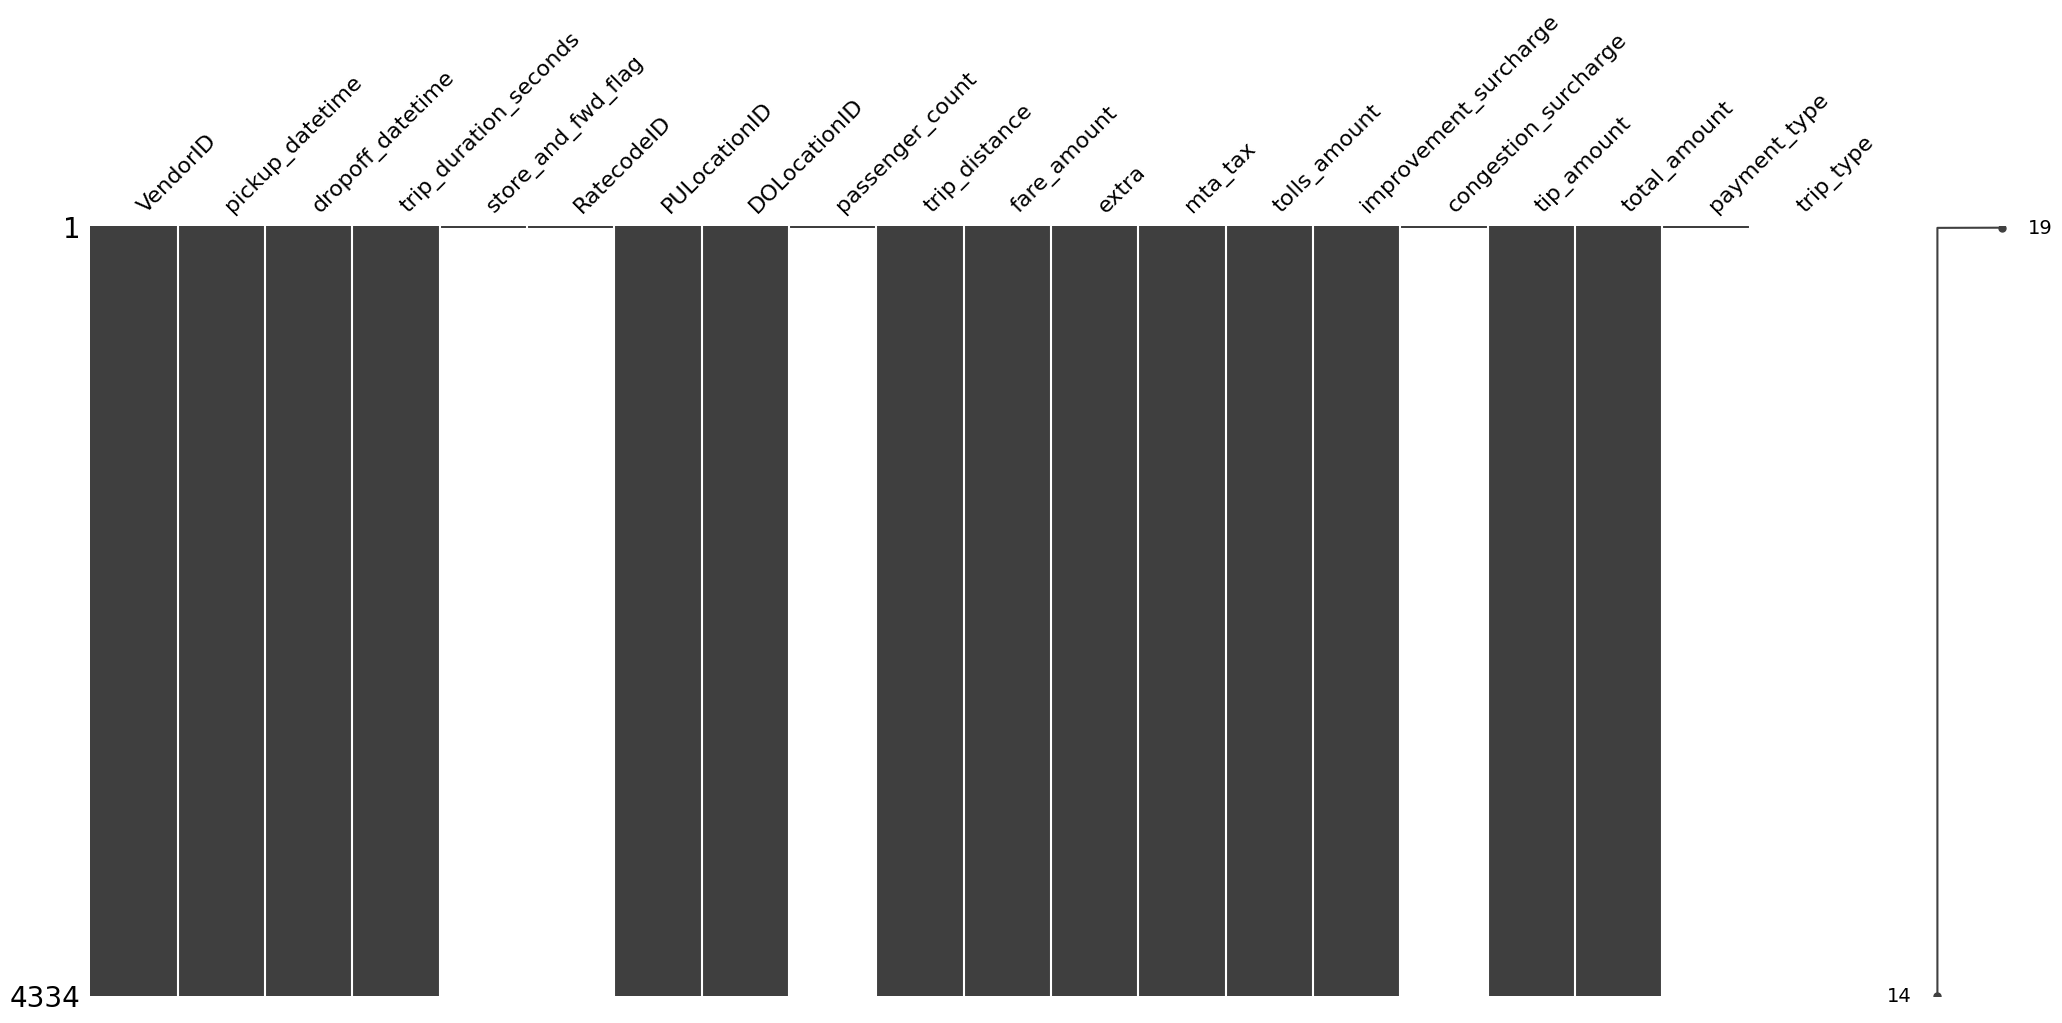

In [23]:
msno.matrix(df[df.trip_type.isna().values])

<u>**Insight**</u>
<br>Secara keseluruhan, ada **4334** missing values yang terlihat disebabkan oleh dua kemungkinan, karena nilai RatecodeID dan store_and_fwd_flag. Kedua kemungkinan ini akan diteliti lebih lanjut.

<Axes: >

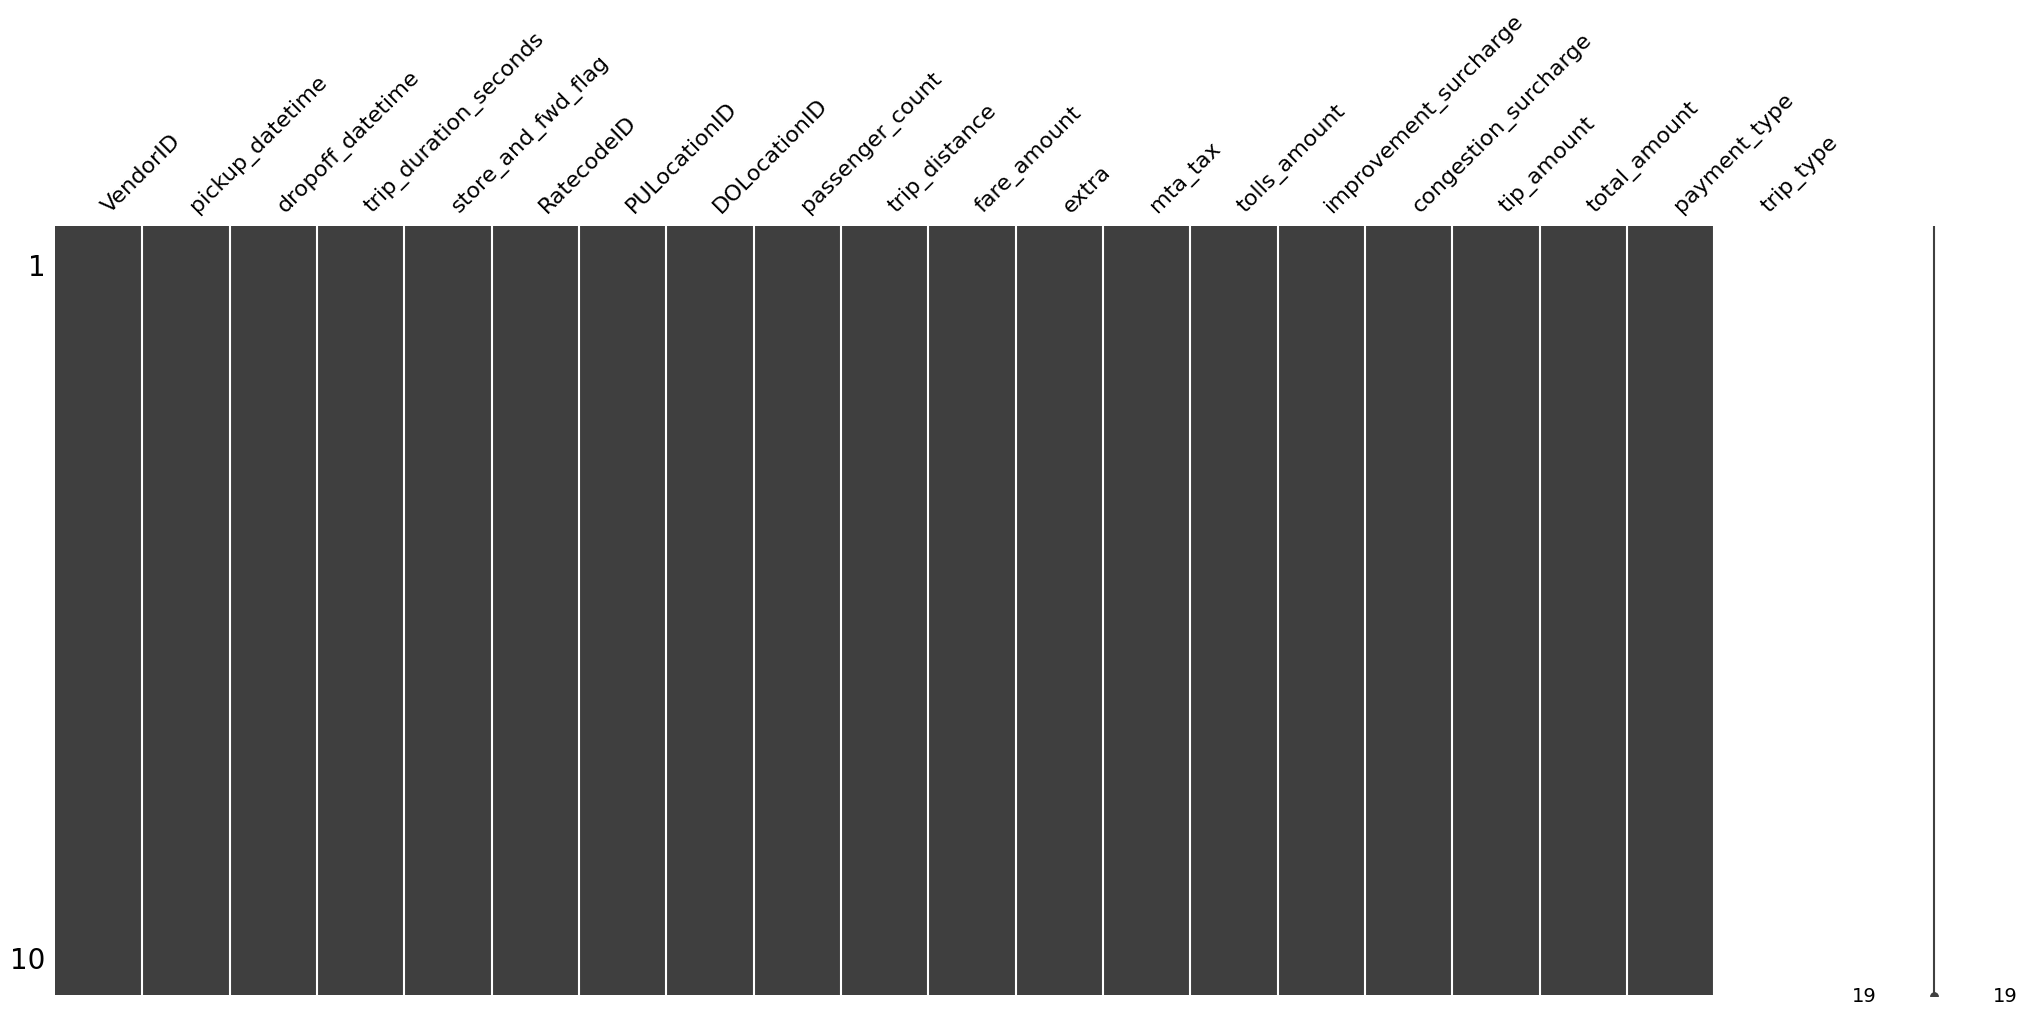

In [24]:
msno.matrix(df[(df.store_and_fwd_flag.notna().values) & (df.RatecodeID == 99)])

<u>**Insight**</u>
<br>Ditemukan bahwa ketika RatecodeID = 99, semua kolom trip_type tidak mempunyai nilai (ada sebanyak **10** poin data). Penanganan yang paling mungkin adalah mengelompokkan data menjadi trip_type yang berbeda (misalkan unknown).

<Axes: >

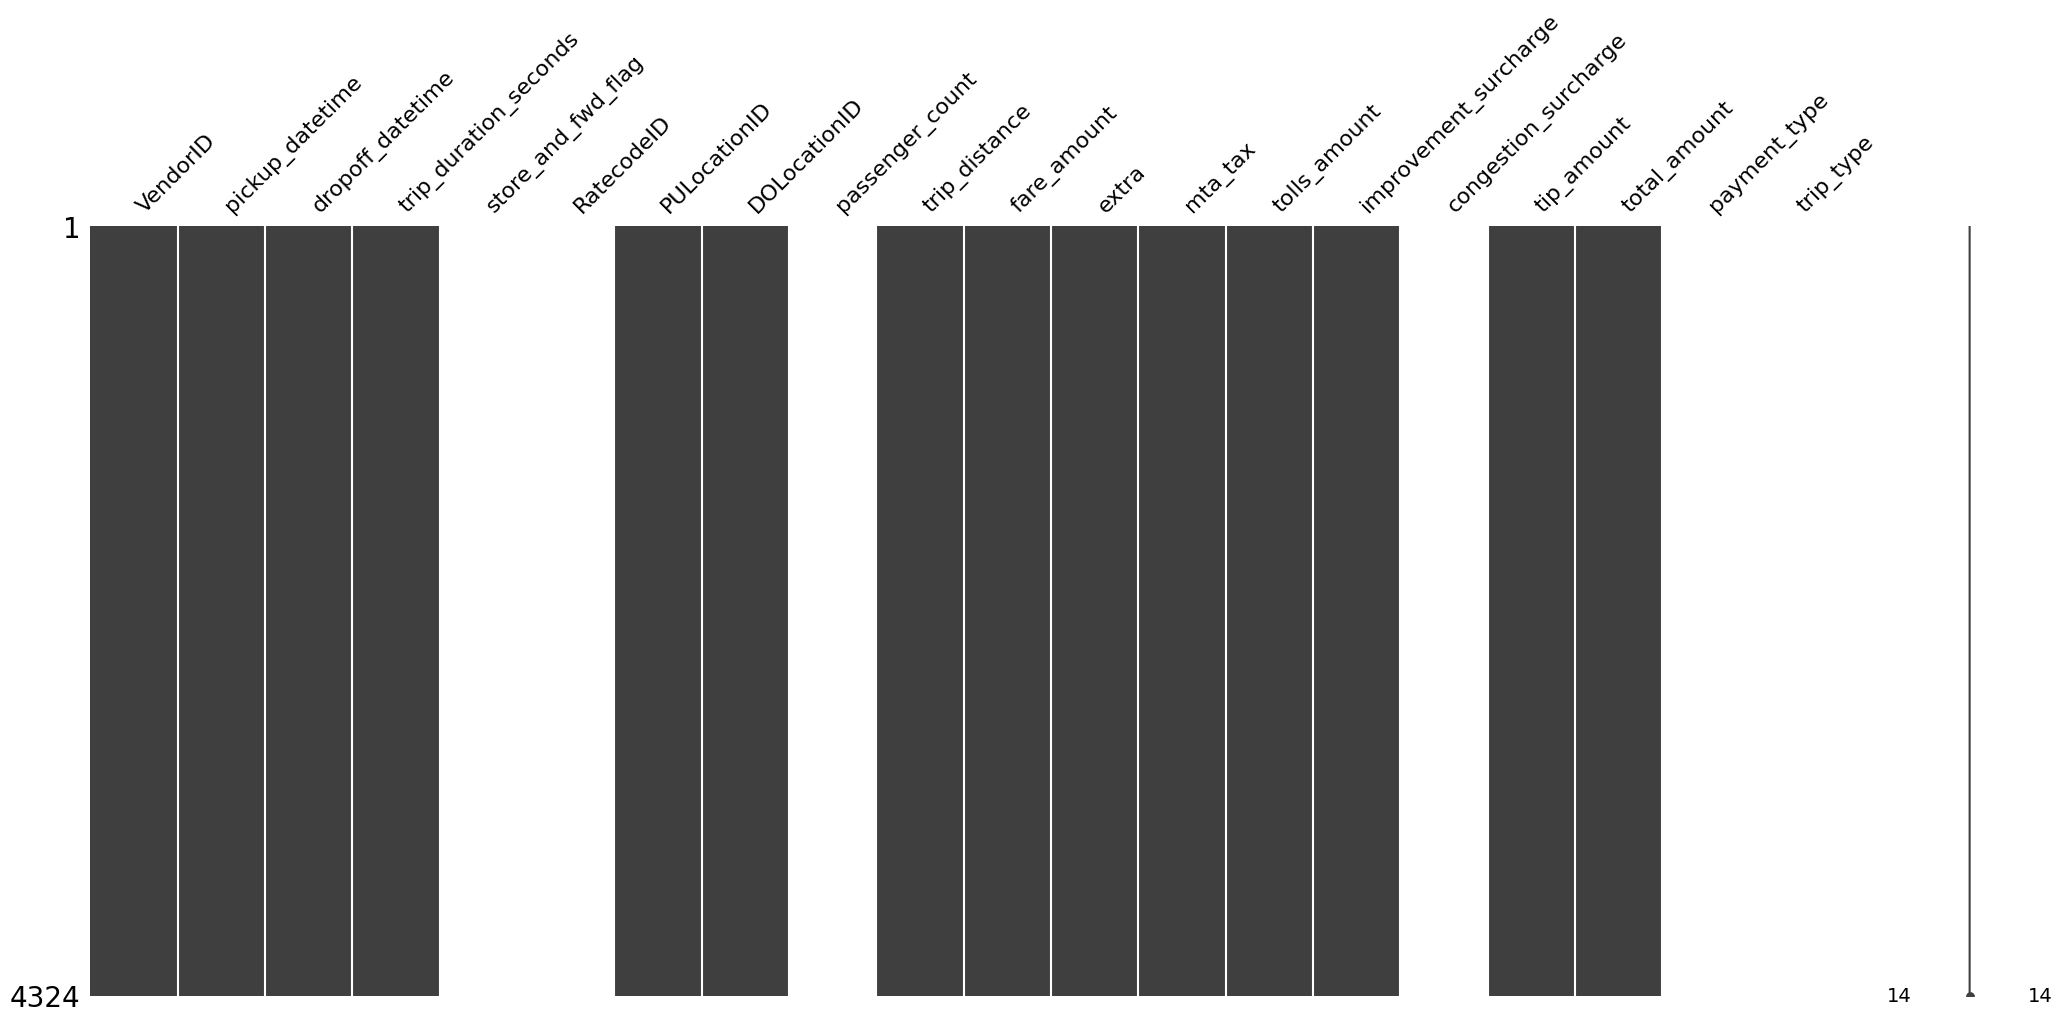

In [25]:
msno.matrix(df[df.store_and_fwd_flag.isna().values])

<Axes: >

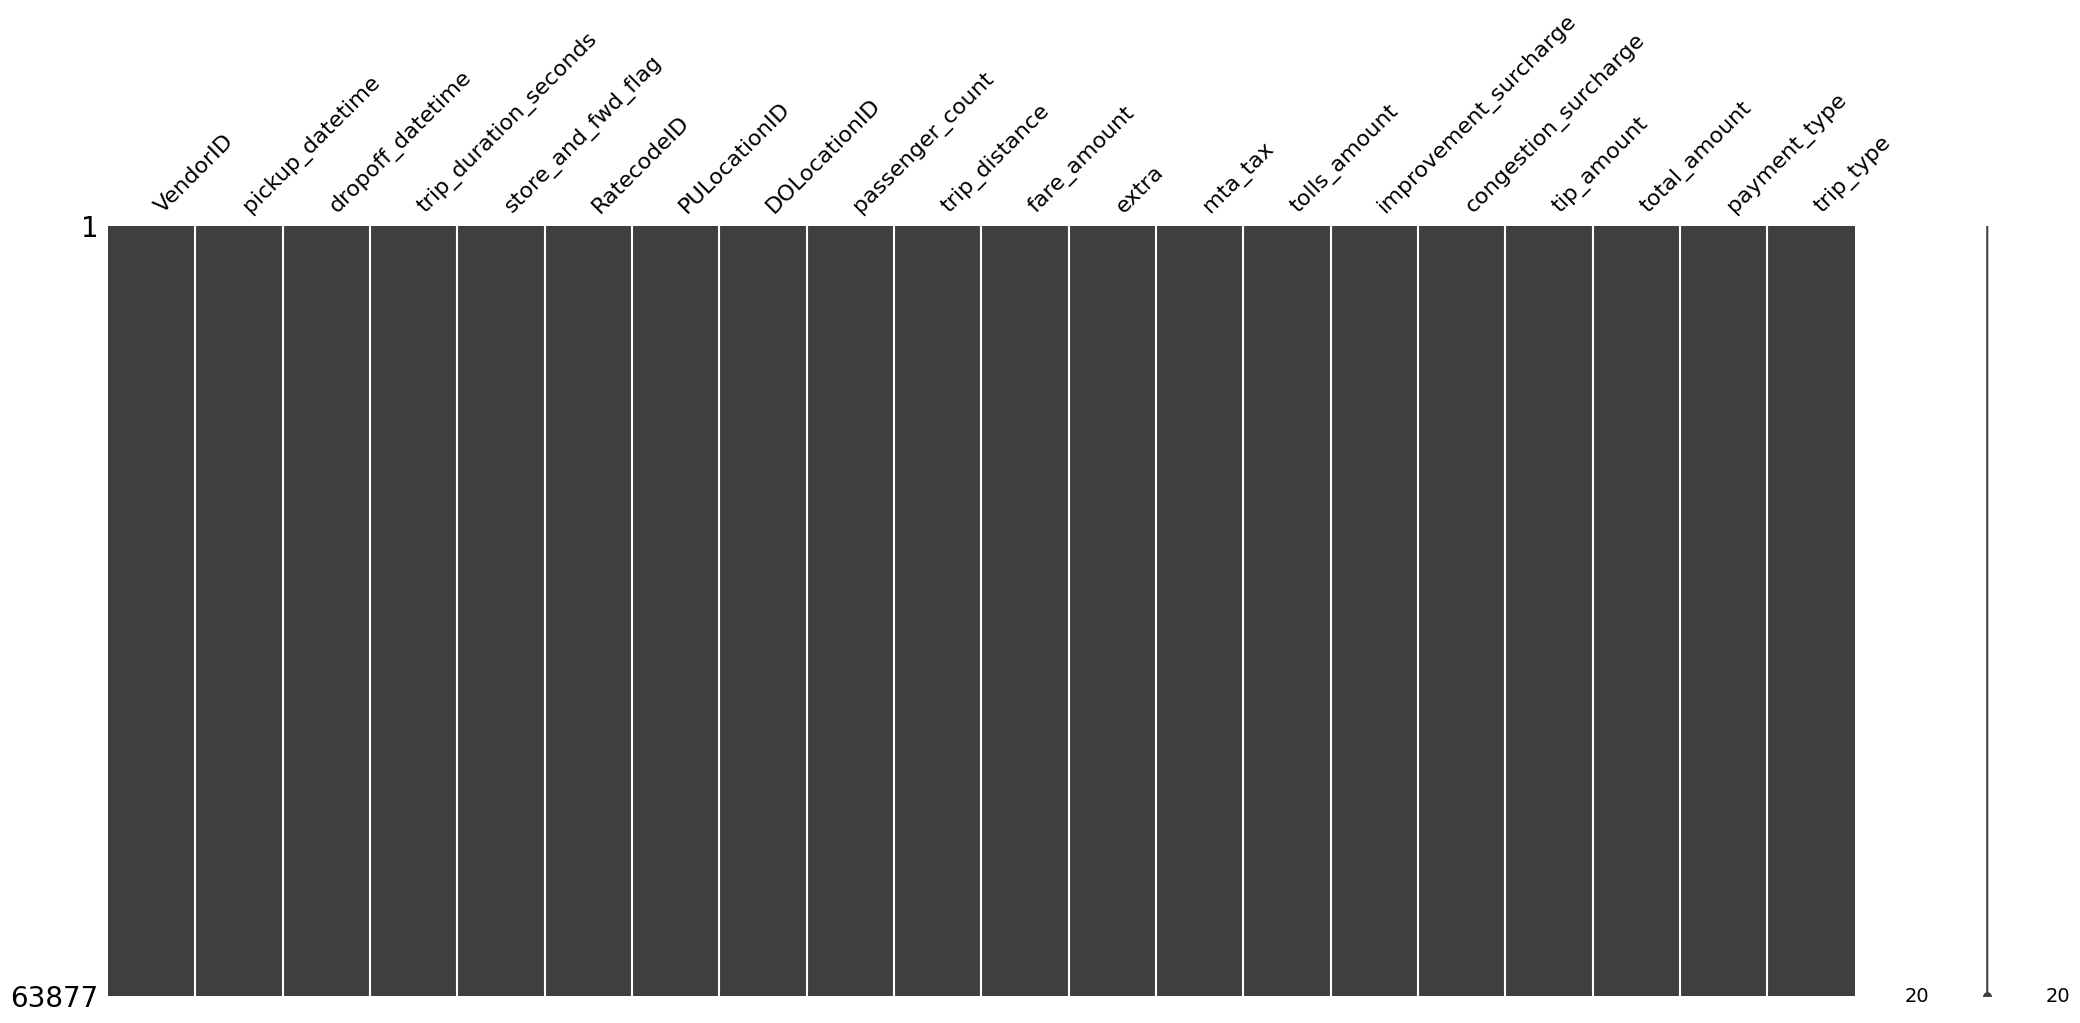

In [26]:
msno.matrix(df[(df.store_and_fwd_flag.notna().values) & (df.RatecodeID != 99)])

<u>**Insight**</u>
<br>Di sisa missing values yang ada (sebanyak **4324** poin data atau sekitar **6.33%**) terlihat bahwa ketika store_and_fwd_flag tidak diketahui nilainya, kolom RatecodeID, passenger_count, congestion_surcharge, payment_type, dan trip_type juga tidak ada nilainya. Sementara ketika store_and_fwd_flag ada nilainya, kelima kolom tersebut juga mempunyai nilai. Dengan begitu, dapat diasumsikan bahwa missing values pada kolom RatecodeID, passenger_count, congestion_surcharge, payment_type, dan trip_type bersifat **Missing At Random (MAR)**. Selanjutnya, handling missing values untuk kolom ini akan mengikuti handling missing values untuk data MAR.

## **1.5 Outliers**

Dari skimming data awal, ada 5 atribut dataset yang mempunyai tipe data numerical dan continuous yaitu trip_distance, trip_duration, fare_amount, tip_amount, dan total_amount. Akan tetapi, total_amount merupakan penjumlahan dari kolom-kolom tarif dan perlu dihitung ulang setelah melakukan data cleansing. Untuk pemahaman data saat ini, hanya trip_distance, trip_duration, fare_amount, dan tip_amount yang akan dieksplorasi distribusi dan outliernya.

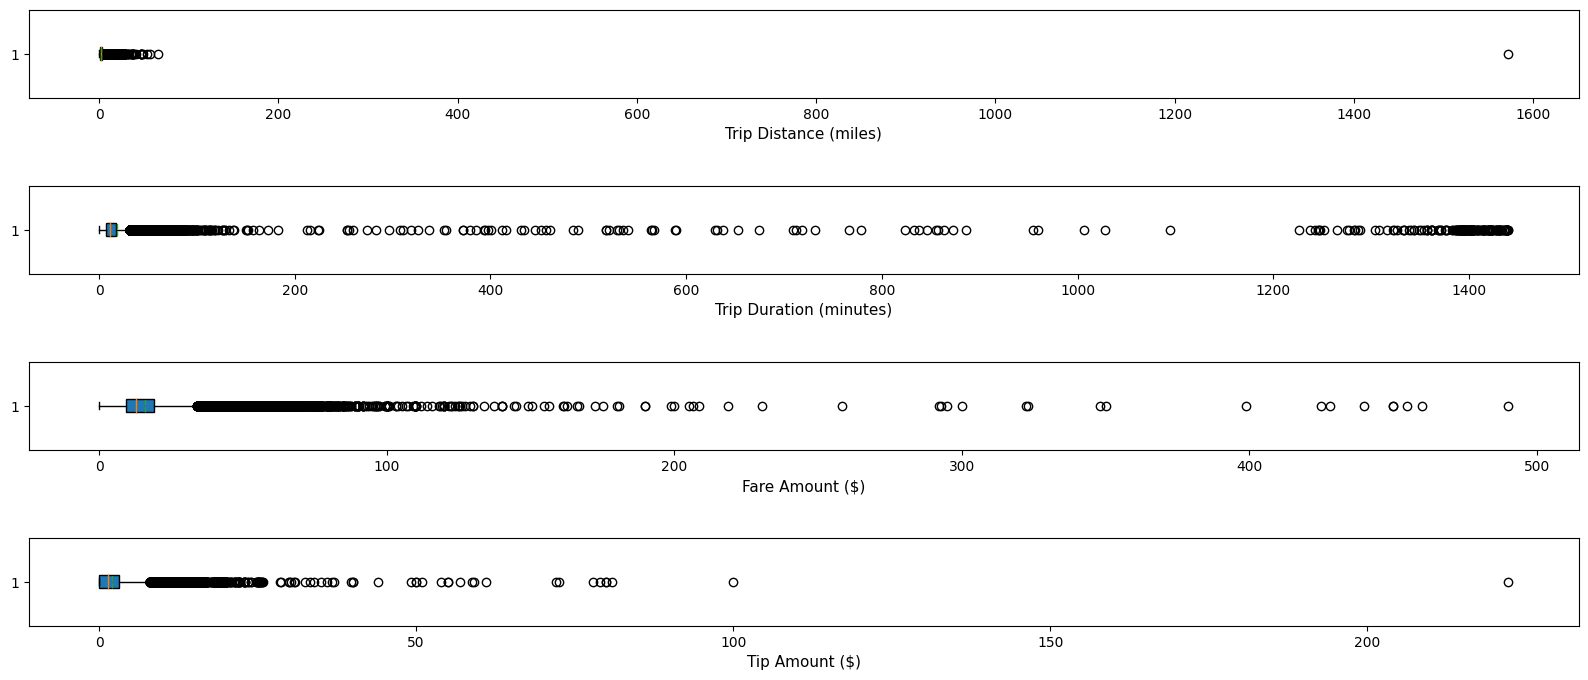

In [27]:
# exclude nan values
trip_distance = df.dropna().trip_distance
trip_duration_minutes = df.dropna().trip_duration_seconds.apply(lambda x: x/60)
fare_amount = df.dropna().fare_amount.apply(abs)
tip_amount = df.dropna().tip_amount.apply(abs)

fig, axes = plt.subplots(4, 1, figsize=(20, 8))
axes[0].boxplot(trip_distance, patch_artist=True, meanline=True, showmeans=True, vert=False)
axes[1].boxplot(trip_duration_minutes, patch_artist=True, meanline=True, showmeans=True, vert=False)
axes[2].boxplot(fare_amount, patch_artist=True, meanline=True, showmeans=True, vert=False)
axes[3].boxplot(tip_amount, patch_artist=True, meanline=True, showmeans=True, vert=False)

axes[0].set_xlabel("Trip Distance (miles)", fontsize=11)
axes[1].set_xlabel("Trip Duration (minutes)", fontsize=11)
axes[2].set_xlabel("Fare Amount ($)", fontsize=11)
axes[3].set_xlabel("Tip Amount ($)", fontsize=11)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.5, hspace=1)
plt.show()

<u>**Insight**</u>
<br>Pengamatan distribusi continuous data adalah tanpa nilai missing values. Secara grafik, terlihat jelas adanya outlier pada setiap atribut yang mengindikasikan distribusi data keempat atribut adalah tidak normal. Perlu diperhatikan juga interpretasi trip_distance, trip_duration, dan fare_amount yang bernilai 0.

Rentang data dapat dibatasi berdasarkan domain knowledge yaitu:
* Kemungkinan jarak terjauh yang ditempuh antara dua titik dalam New York City dari Google Maps adalah 50mil
* Durasi maksimal satu perjalanan taksi adalah 12 jam sesuai ketentuan dari NYC TLC (referensi: https://www.nyc.gov/assets/tlc/downloads/pdf/rule_book_current_chapter_54.pdf)
* Jumlah tip kurang logis jika nilainya lebih besar dari 2 kali nilai tarif dasar (fare_amount)

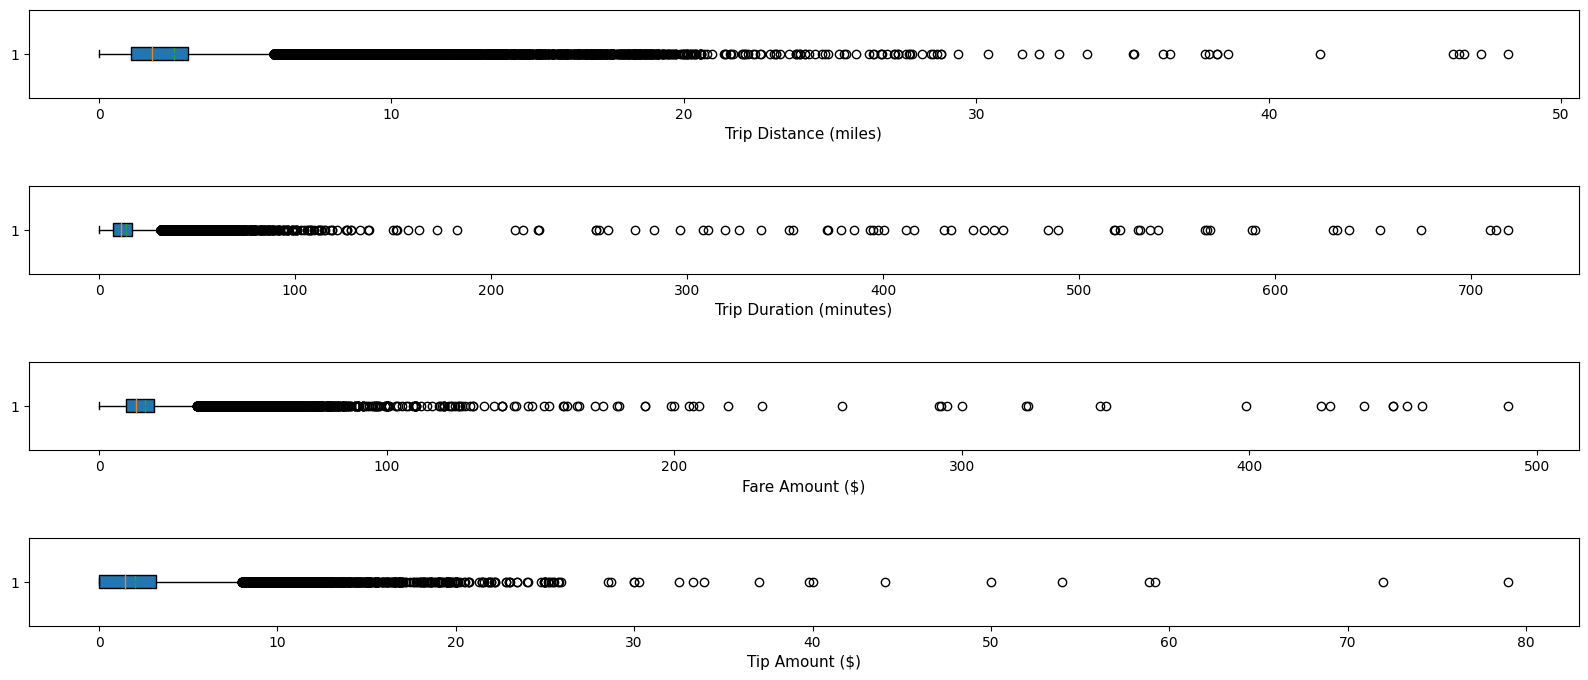

In [28]:
# memfilter jarak tempuh <= 48.5 mil
trip_distance = df[df.trip_distance <= 48.5].dropna().trip_distance
# memfilter durasi perjalanan <= 12 jam
trip_duration_minutes = df[df.trip_duration_seconds <= 12*3600].dropna().trip_duration_seconds.apply(lambda x: x/60)
fare_amount = df.dropna().fare_amount.apply(abs)
# memfilter jumlah tip <= 2 kali jumlah tarif perjalanan
tip_amount = df[df.tip_amount <= 2*df.fare_amount].dropna().tip_amount.apply(abs)

fig, axes = plt.subplots(4, 1, figsize=(20, 8))
axes[0].boxplot(trip_distance, patch_artist=True, meanline=True, showmeans=True, vert=False)
axes[1].boxplot(trip_duration_minutes, patch_artist=True, meanline=True, showmeans=True, vert=False)
axes[2].boxplot(fare_amount, patch_artist=True, meanline=True, showmeans=True, vert=False)
axes[3].boxplot(tip_amount, patch_artist=True, meanline=True, showmeans=True, vert=False)

axes[0].set_xlabel("Trip Distance (miles)", fontsize=11)
axes[1].set_xlabel("Trip Duration (minutes)", fontsize=11)
axes[2].set_xlabel("Fare Amount ($)", fontsize=11)
axes[3].set_xlabel("Tip Amount ($)", fontsize=11)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.5, hspace=1)
plt.show()

`PERSENTASE OUTLIERS`

<u>**Insight**</u>
<br>Outlier masih ada meskipun rentang data beberapa atribut sudah dibatasi. Akan tetapi, garis nilai median (garis berwarna oranye) dan garis nilai rata-rata (garis dash berwarna hijau) dari setiap atribut terlihat sedikit lebih jelas dan keduanya tidak beririsan, yang memang merupakan salah satu karakteristik lain dari data dengan distribusi tidak normal.

## **1.6 Summary**

1. Kelompok tipe data dan atribut di dataset ini:
    * **Numerical**, **Discrete**
    VendorID, RatecodeID, PULocationID, DOLocationID, passenger_count, extra, mta_tax, tolls_amount, ehail_fee, improvement_surcharge, congestion_surcharge, payment_type, trip_type
    * **Numerical**, **Continuous**
    trip_duration_seconds, trip_distance, fare_amount, tip_amount, total_amount
    * **Datetime**
    pickup_datetime, dropoff_datetime
    * **Categorical**, **Nominal**
    store_and_fwd_flag

2. Koreksi tipe data setelah handling negative dan missing values:
    * Kolom tarif dengan tipe data numerical, discrete (extra, mta_tax, tolls_amount, improvement_surcharge, congestion_surcharge) perlu diubah menjadi object
    * Tipe data kolom RatecodeID, passenger_count, payment_type, trip_type perlu diubah dari float64 menjadi int64

3. Dataset perlu dihubungkan dengan dataset lain yang mempunyai keterangan nama zone dan borough dari ID lokasi pickup dan drop-off.

4. Lingkup waktu dataset dibatasi pada bulan Januari 2023. Data di luar periode ini akan didrop.<br>

5. Ada 185 duplikasi data secara waktu pickup dan drop-off. Asumsi duplikasi terjadi karena koreksi nilai yang salah dan kebanyakan karena koreksi tarif yang bernilai negatif. Tetapi, tidak semua data tarif yang benilai negatif masuk ke dalam duplikasi data sehingga tetap perlu dilakukan handling negative values. Handling duplicated data adalah mengambil data terakhir yang tersimpan.

6. Kolom ehail_fee sepenuhnya kosong, diasumsikan tidak ada pemesanan taksi melalui aplikasi sehingga kolom akan didrop.

7. Missing values diasumsikan terjadi karena dua hal:
    * Ketika RatecodeID = 99, kolom trip_type semua kosong (sebanyak 10 poin data). Poin data untuk kasus ini didrop mengingat jumlahnya yang sangat sedikit.
    * Ketika store_and_fwd_flag merupakan missing values, kolom RatecodeID, passenger_count, congestion_surcharge, payment_type, dan trip_type di baris (poin data) yang sama juga merupakan missing values sehingga asumsi missing values bersifat MAR. Tetapi, kolom store_and_fwd_flag tidak akan digunakan untuk analisis sehingga nantinya akan didrop. Handling missing values kemudian akan disesuaikan tergantung kolom.

8. Outlier ada pada semua atribut continuous data yang mengindikasikan distribusi data tidak normal dan perlu dilakukan handling outlier.

# **2. Data Preparation**

## **2.1 Handling Duplicated Data**

In [29]:
print(f"n_data before removing duplicates: {len(df)}")
print(f"n_data with duplicates: {len(df[df.duplicated(subset=['pickup_datetime', 'dropoff_datetime'], keep='last')])}")

df.drop_duplicates(subset=['pickup_datetime', 'dropoff_datetime'], keep='last', inplace=True)
print(f"n_data after removing duplicates: {len(df)}")

n_data before removing duplicates: 68211
n_data with duplicates: 185
n_data after removing duplicates: 68026


## **2.2 Handling Negative Values**

In [30]:
# melakukan absolut nilai negatif pada kolom-kolom tarif
df.loc[:,'fare_amount':'congestion_surcharge'] = df.loc[:,'fare_amount':'congestion_surcharge'].apply(abs)

## **2.3 Dropping Attributes Not Used**

In [31]:
# drop kolom yang tidak akan digunakan dalam analisis
df.drop(columns=['VendorID', 'store_and_fwd_flag'], inplace=True)

## **2.4 Handling Pickup Datetime**

In [32]:
# menampilkan pickup di luar bulan Januari 2023
df[~((df.pickup_datetime.apply(lambda x: x.year) == 2023) & (df.pickup_datetime.apply(lambda x: x.month) == 1))]

,pickup_datetime,dropoff_datetime,trip_duration_seconds,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,congestion_surcharge,tip_amount,total_amount,payment_type,trip_type
298,2022-12-09 14:10:49,2022-12-09 14:22:26,697,1.0,7,56,1.0,5.37,16.0,0.0,0.5,0.00,0.3,0.00,0.00,16.80,2.0,1.0
318,2022-12-09 14:55:42,2022-12-09 15:33:06,2244,1.0,260,164,1.0,5.48,25.5,0.0,0.5,6.55,0.3,2.75,0.00,35.60,2.0,1.0
17874,2009-01-01 20:21:27,2009-01-02 11:07:31,53164,1.0,65,178,1.0,7.72,34.5,0.0,0.5,0.00,1.0,0.00,7.20,43.20,1.0,1.0
25100,2023-02-01 03:10:05,2023-02-01 03:40:35,1830,5.0,82,198,2.0,4.58,28.0,0.0,0.0,0.00,0.3,0.00,5.66,33.96,1.0,2.0


<u>**Insight**</u>
<br>Terlihat bahwa ada 4 poin data yang mempunyai tanggal pickup dan drop-off di luar periode bulan Januari 2023. Keempat data ini akan didrop karena lingkup waktu data yang digunakan hanya di bulan Januari 2023.

In [33]:
print(f"n_data before removing irrelevant pickup time: {len(df)}")
print(f"n_data with irrelevant pickup time: {len(df[~((df.pickup_datetime.apply(lambda x: x.year) == 2023) & (df.pickup_datetime.apply(lambda x: x.month) == 1))])}")

# hanya mengambil data pickup di bulan Januari 2023
df = df[(df.pickup_datetime.apply(lambda x: x.year) == 2023) & (df.pickup_datetime.apply(lambda x: x.month) == 1)]
print(f"n_data after removing irrelevant pickup time: {len(df)}")

n_data before removing irrelevant pickup time: 68026
n_data with irrelevant pickup time: 4
n_data after removing irrelevant pickup time: 68022


## **2.5 Pickup, Drop-off Location ID**

In [34]:
df_zone = pd.read_csv('../data/raw/taxi_zone_lookup.csv')
display(skim_dtype(df_zone), df_zone.isna().sum(), df_zone[df_zone.service_zone.isna().values])

rows, columns: 265, 4


,attribute,data_type,n_unique,sample_unique
0,LocationID,int64,265,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, ..."
1,Borough,object,7,"[EWR, Queens, Bronx, Manhattan, Staten Island, Brooklyn, Unknown]"
2,Zone,object,261,"[Newark Airport, Jamaica Bay, Allerton/Pelham Gardens, Alphabet City, Arden Heights, Arrochar/Fort Wadsworth, Astoria, Astoria Park, Auburndale, Baisley Park, Bath Beach, Battery Park, Battery Par..."
3,service_zone,object,4,"[EWR, Boro Zone, Yellow Zone, Airports, nan]"


LocationID      0
Borough         0
Zone            1
service_zone    2
dtype: int64

,LocationID,Borough,Zone,service_zone
263,264,Unknown,NV,NaN
264,265,Unknown,NaN,NaN


<u>**Insight**</u>
<br>Dari data taxi zone lookup, terdapat dua LocationID yang tidak diketahui nama wilayahnya yaitu ID 264 dan 265.

In [35]:
df[(df.PULocationID.isin([264,265])) | (df.DOLocationID.isin([264,265]))]

,pickup_datetime,dropoff_datetime,trip_duration_seconds,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,congestion_surcharge,tip_amount,total_amount,payment_type,trip_type
31,2023-01-01 00:46:48,2023-01-01 01:08:17,1289,4.0,95,265,1.0,10.44,47.10,1.0,0.5,0.00,1.0,0.0,9.92,59.52,1.0,1.0
115,2023-01-01 01:52:58,2023-01-01 01:53:00,2,1.0,264,264,1.0,0.00,3.00,1.0,0.5,0.00,0.3,0.0,21.50,26.30,1.0,1.0
173,2023-01-01 02:37:12,2023-01-01 02:37:15,3,5.0,260,264,1.0,0.00,20.00,0.0,0.0,0.00,1.0,0.0,4.20,25.20,1.0,2.0
186,2023-01-01 03:01:54,2023-01-01 03:01:56,2,5.0,129,264,1.0,0.00,12.00,0.0,0.0,0.00,1.0,0.0,0.00,13.00,1.0,2.0
227,2023-01-01 03:11:48,2023-01-01 03:12:31,43,5.0,7,264,1.0,0.00,12.00,0.0,0.0,0.00,1.0,0.0,2.60,15.60,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67311,2023-01-25 11:26:00,2023-01-25 11:35:00,540,NaN,240,265,NaN,3.87,26.03,0.0,0.0,0.00,1.0,NaN,3.00,30.03,NaN,NaN
67733,2023-01-28 07:39:00,2023-01-28 08:30:00,3060,NaN,89,265,NaN,21.87,97.24,0.0,0.0,19.30,1.0,NaN,23.51,141.05,NaN,NaN
67792,2023-01-28 16:45:00,2023-01-28 17:39:00,3240,NaN,49,265,NaN,7.74,36.40,0.0,0.0,14.75,1.0,NaN,7.82,59.97,NaN,NaN
67940,2023-01-29 21:41:00,2023-01-29 22:13:00,1920,NaN,175,265,NaN,21.30,82.19,0.0,0.0,6.55,1.0,NaN,17.95,107.69,NaN,NaN


<u>**Insight**</u>
<br>Di data green taxi, terdapat 704 poin data yang mempunyai titik pickup atau drop-off di lokasi ID 264 atau 265. Data ini selanjutnya tidak akan digunakan dalam analisis karena tidak dapat memberikan informasi lokasi.

In [36]:
print(f"n_data before removing unknown location name: {len(df)}")
print(f"n_data with unknown location name: {len(df[(df.PULocationID.isin([264,265])) | (df.DOLocationID.isin([264,265]))])}")

# hanya mengambil data pickup di bulan Januari 2023
df = df[(~df.PULocationID.isin([264,265])) & (~df.DOLocationID.isin([264,265]))]
print(f"n_data after removing unknown location name: {len(df)}")

n_data before removing unknown location name: 68022
n_data with unknown location name: 705
n_data after removing unknown location name: 67317


Data green taxi kemudian dihubungkan dengan data taxi zone lookup. Pembuatan kolom baru juga dilakukan, yang berisikan rute perjalanan secara zone, borough, dan service zone.

In [37]:
df = df.merge(df_zone.set_index('LocationID'), how='left', left_on='PULocationID', right_index=True)
df.rename(columns={'Borough': 'pickup_borough',
                    'Zone': 'pickup_zone',
                    'service_zone': 'pickup_service_zone'}, inplace=True)

df = df.merge(df_zone.set_index('LocationID'), how='left', left_on='DOLocationID', right_index=True)
df.rename(columns={'Borough': 'dropoff_borough',
                    'Zone': 'dropoff_zone',
                    'service_zone': 'dropoff_service_zone'}, inplace=True)

df.drop(columns=['PULocationID', 'DOLocationID'], inplace=True)

## **2.6 Handling Missing Values**

<Axes: >

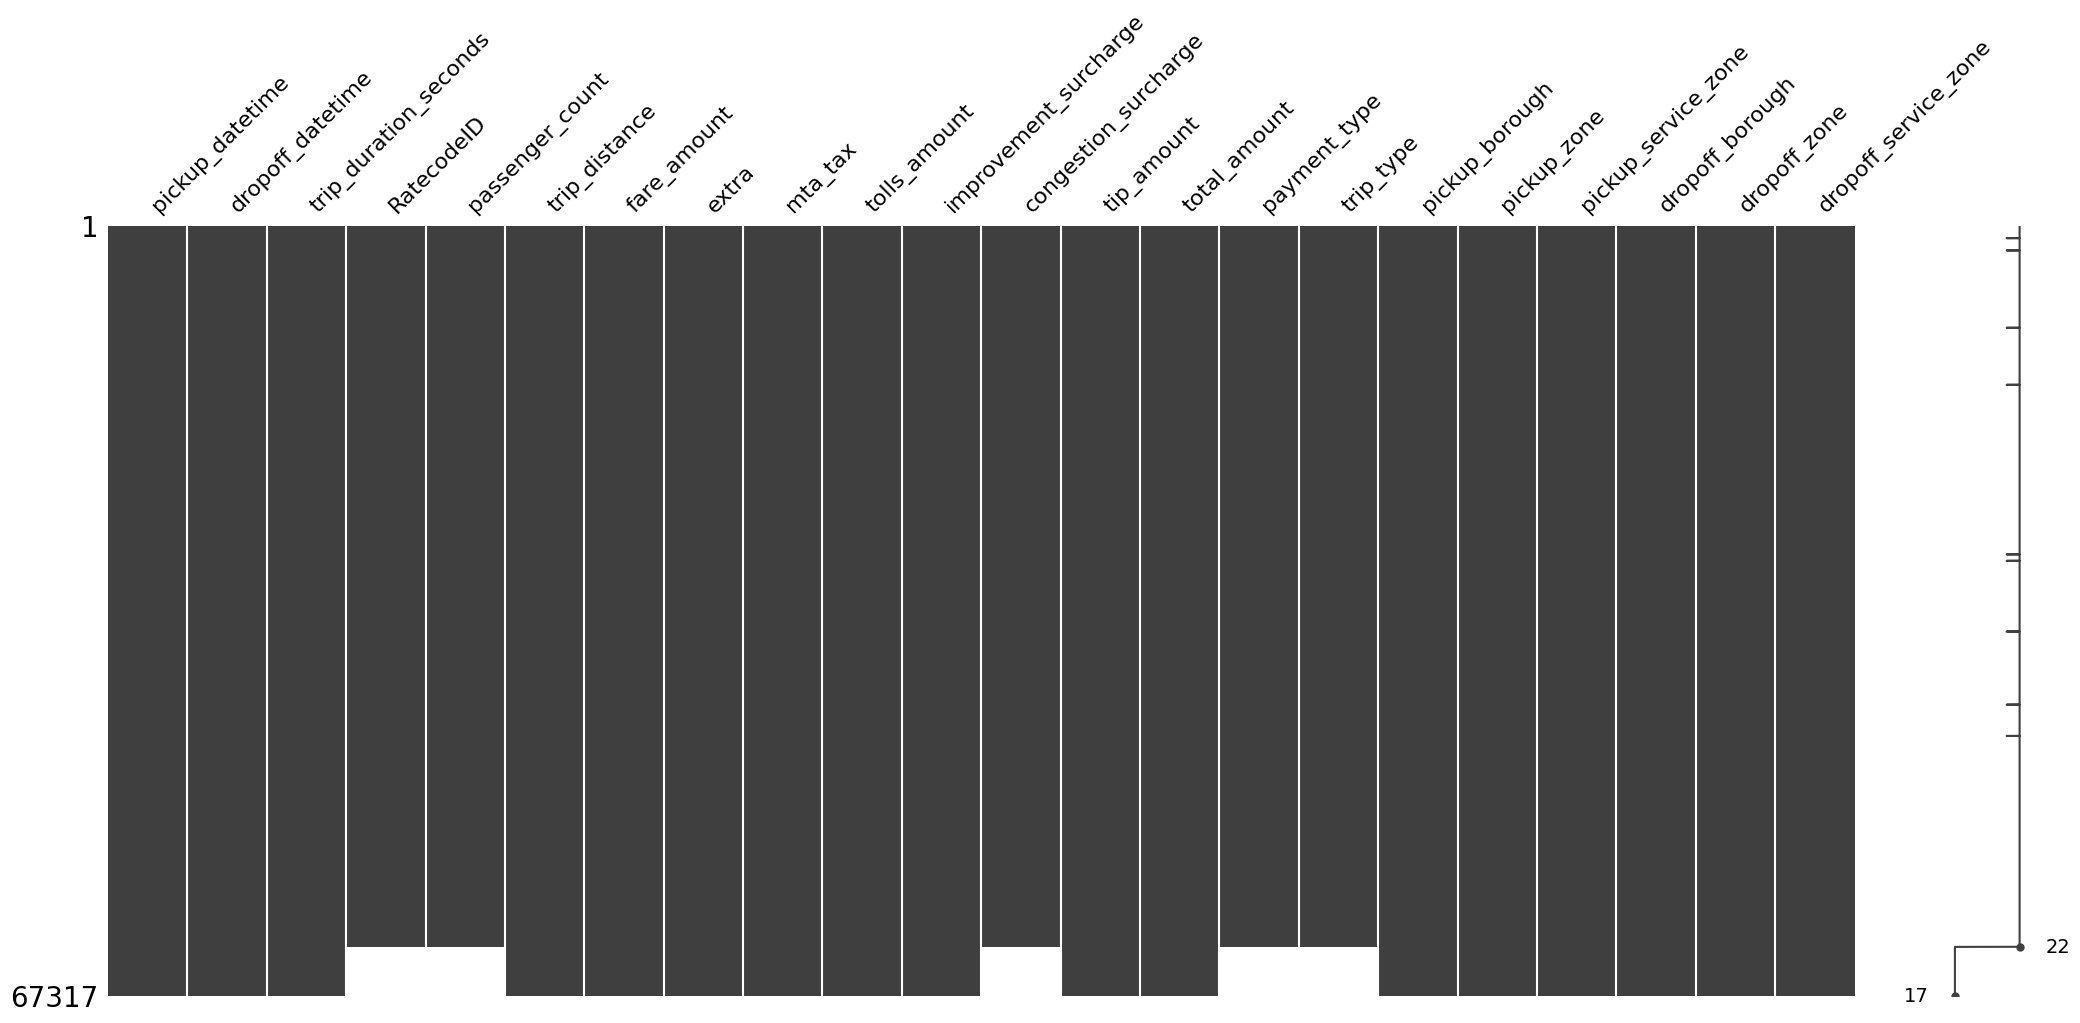

In [38]:
msno.matrix(df)

In [39]:
df.isna().sum()

pickup_datetime             0
dropoff_datetime            0
trip_duration_seconds       0
RatecodeID               4294
passenger_count          4294
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     4294
tip_amount                  0
total_amount                0
payment_type             4294
trip_type                4303
pickup_borough              0
pickup_zone                 0
pickup_service_zone         0
dropoff_borough             0
dropoff_zone                0
dropoff_service_zone        0
dtype: int64

Perlu diperhatikan bahwa lima kolom yang memiliki missing values mempunyai tipe data numerical, discrete.

In [40]:
df_old = df.copy()

### 2.6.1 RatecodeID

In [41]:
# mengoreksi RatecodeID sesuai rute perjalanan
# tidak mengubah RatecodeID 5 dan 99
# RatecodeID 2: Perjalanan dari Manhattan ke JFK dan sebaliknya
# RatecodeID 3: Perjalanan ke Newark Airport
# selain itu merupakan RatecodeID 1

df['RatecodeID'] = np.where(df.RatecodeID.isin([5,99]), df.RatecodeID,\
    np.where(((df.pickup_borough == 'Manhattan') & (df.dropoff_zone == 'JFK Airport')) | ((df.pickup_zone == 'JFK Airport') & (df.dropoff_borough == 'Manhattan')), 2,\
    np.where(df.dropoff_zone == 'Newark Airport', 3, 1))).astype('int64').astype('object')

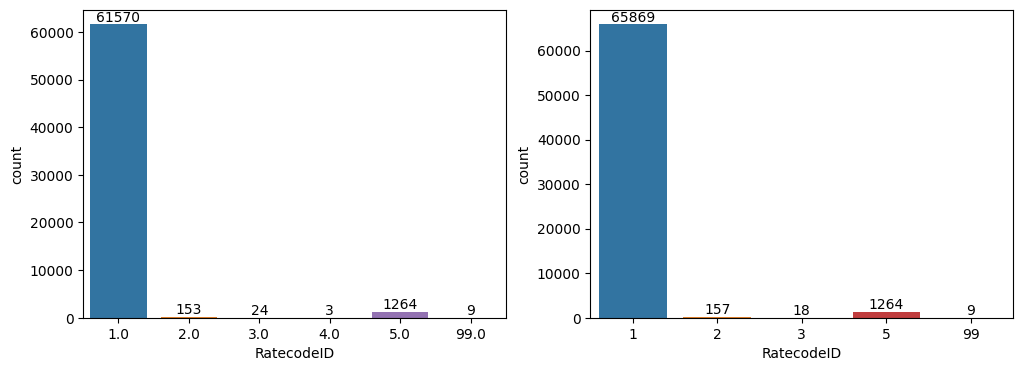

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = sns.countplot(data=df_old, x='RatecodeID', ax=axes[0])
ax.bar_label(ax.containers[0])
ax = sns.countplot(data=df, x='RatecodeID', ax=axes[1])
ax.bar_label(ax.containers[0])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.show();

<u>**Insight**</u>
<br>Gambar di atas adalah perbedaan antara sebelum (kiri) dan sesudah (kanan) melakukan koreksi pada RatecodeID dan missing valuesnya. Dari awal, RatecodeID 1 dominan dan kebanyakan dari missing values juga masuk ke dalam kategori Ratecode ini. Ada sedikit perubahan pada jumlah data RatecodeID 2, 3 akibat koreksi kesesuaian rute perjalanan ke airport dan RatecodeIDnya. Selanjutnya bisa dilakukan handling outlier untuk data kategorikal yaitu mengelompokkan RatecodeID yang jumlah datanya sedikit.

In [43]:
# memisahkan data dengan dan tanpa missing values
df_na = df[df.passenger_count.isna().values].copy()
df_notna = df[~(df.passenger_count.isna().values)].copy()

### 2.6.2 Passenger Count

Imputasi untuk missing values jumlah penumpang dilakukan dengan menggunakan jumlah minimal penumpang taksi, yaitu 1. Data perjalanan tidak akan ada jika tidak ada penumpang, dan ada karena setidaknya ada satu penumpang.

In [44]:
df_na.passenger_count.fillna(1, inplace=True)

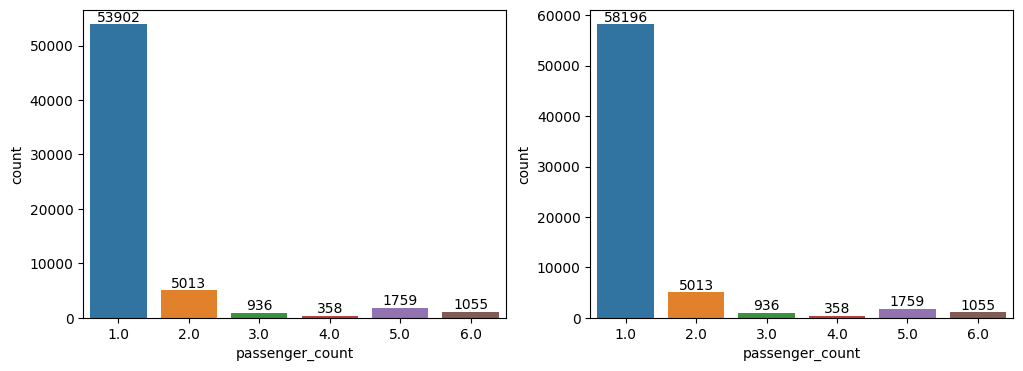

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = sns.countplot(data=df_old, x='passenger_count', ax=axes[0])
ax.bar_label(ax.containers[0])
ax = sns.countplot(data=pd.concat([df_notna, df_na], axis=0).sort_index(), x='passenger_count', ax=axes[1])
ax.bar_label(ax.containers[0])
plt.show();

<u>**Insight**</u>
<br>Gambar di atas adalah perbedaan antara sebelum (kiri) dan sesudah (kanan) melakukan koreksi pada passenger_count dan missing valuesnya. Perjalanan untuk satu penumpang dominan dan semua missing values masuk ke dalam kategori Ratecode ini. Handling outlier untuk kategori ini bisa dilakukan dengan mengelompokkan single (satu) dan multiple (lebih dari satu) passenger.

### 2.6.3 Congestion Surcharge

interval columns not set, guessing: ['fare_amount', 'congestion_surcharge']
interval columns not set, guessing: ['fare_amount', 'congestion_surcharge']


''

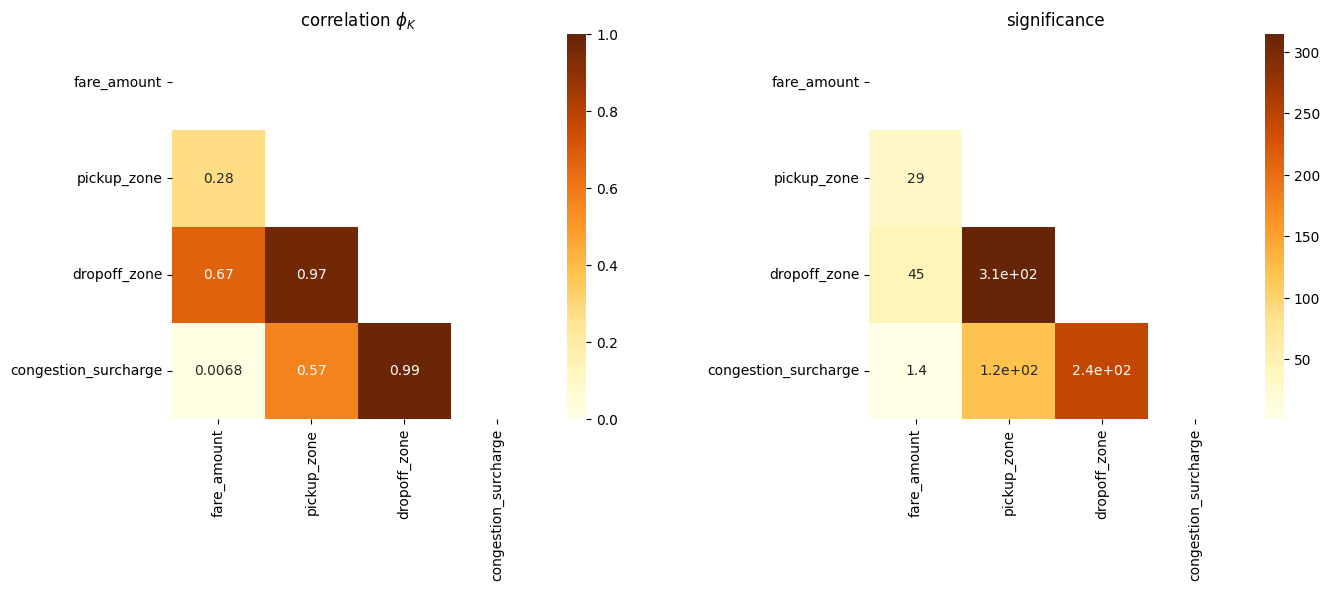

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.1)

cols = ['fare_amount', 'pickup_zone','dropoff_zone', 'congestion_surcharge']

corr = df_notna[cols].phik_matrix()
corr_mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=corr_mask, vmin=0, vmax=1, annot=True, cmap="YlOrBr", ax=ax[0])

sig = df_notna[cols].significance_matrix()
sig_mask = np.triu(np.ones_like(sig, dtype=bool))
sns.heatmap(sig, mask=sig_mask, annot=True, cmap="YlOrBr", ax=ax[1])

ax[0].set_title(r'correlation $\phi_K$')
ax[1].set_title(r'significance')
;

<u>**Insight**</u>
<br>4. Congestion surcharge terlihat memiliki korelasi phik dengan beberapa atribut lain yaitu: fare_amount, PU_Zone, dan DO_Zone. Korelasi phik tertinggi adalah antara congestion surcharge dan zona drop-off, didukung dengan nilai signifikansi yang juga cukup tinggi.

Selanjutnya, congestion surcharge akan diimputasi menggunakan peluang bersyarat terhadap zona drop-off.

In [47]:
# membuat cross-tabulasi zona drop-off dan congestion surcharge
congestion_ct = pd.crosstab(df_notna.dropoff_zone, df_notna.congestion_surcharge, margins=True)
# mengurutkan frekuensi congestion surcharge dari nilai tertinggi
congestion_ct.sort_values(by=2.75, ascending=False)

congestion_surcharge,0.0,2.75,All
dropoff_zone,,,
All,46147,16876,63023
Upper East Side North,162,2491,2653
Upper West Side North,821,1417,2238
Yorkville West,101,1410,1511
Upper West Side South,5,1398,1403
...,...,...,...
Homecrest,52,0,52
Howard Beach,28,0,28
Hunts Point,22,0,22


Peluang kemungkinan terjadinya congestion jika diketahui zona drop off dapat diperoleh melalui:
<br>**P(congestion | dropoff_zone) = P(congestion ∩ dropoff_zone) / P(dropoff_zone)**

In [48]:
p_congestion = {'p_congestion': (congestion_ct.iloc[:-1,1] / congestion_ct.iloc[-1,-1]) / (congestion_ct.iloc[:-1,2] / congestion_ct.iloc[-1,-1])}
p_congestion = pd.DataFrame(p_congestion)
p_congestion

,p_congestion
dropoff_zone,
Allerton/Pelham Gardens,0.000000
Alphabet City,0.967213
Astoria,0.008182
Astoria Park,0.000000
Auburndale,0.000000
...,...
Woodlawn/Wakefield,0.000000
Woodside,0.003656
World Trade Center,0.894737


Hasil perhitungan peluang bersyarat terjadinya kemacetan jika diketahui zona drop-off lalu digabungkan dengan data missing values. Congestion surcharge akan dianggap ada ketika peluang lebih dari 0.5.

In [49]:
import math
# menggabungkan peluang bersyarat dengan data missing values
df_na = df_na.merge(p_congestion, how='left', left_on='dropoff_zone', right_index=True)
# mengubah float nan menjadi np.nan
df_na.p_congestion = df_na.p_congestion.apply(lambda x: np.nan if math.isnan(x) else x)
# thresholding peluang > 0.5 dinyatakan macet (atau congestion surcharge ada nilainya, $2.75)
df_na.congestion_surcharge = np.where(df_na.p_congestion.isna().values, np.nan, np.where(df_na.p_congestion > 0.5, 2.75, 0))
# drop kolom p_congestion
df_na.drop(columns='p_congestion', inplace=True)

In [50]:
df_na.dropna(subset='congestion_surcharge', inplace=True)

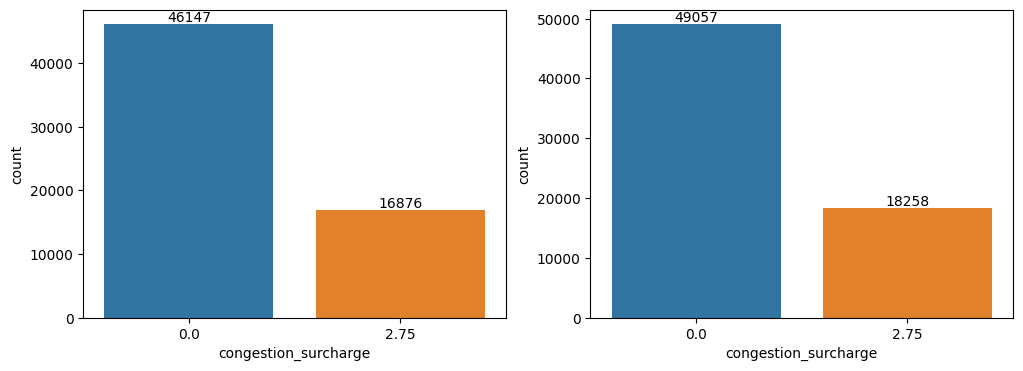

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = sns.countplot(data=df_old, x='congestion_surcharge', ax=axes[0])
ax.bar_label(ax.containers[0])
ax = sns.countplot(data=pd.concat([df_notna, df_na], axis=0).sort_index(), x='congestion_surcharge', ax=axes[1])
ax.bar_label(ax.containers[0])
plt.show();

<u>**Insight**</u>
<br>Gambar di atas adalah perbedaan antara sebelum (kiri) dan sesudah (kanan) melakukan koreksi pada congestion_surcharge dan missing valuesnya. Perjalanan tanpa kemacetan lebih dominan daripada dengan adanya kemacetan. Handling missing values kurang lebih mengkategorikan congestion_surcharge secara imbang.

### 2.6.4 Payment Type

Dari referensi keterangan atribut, payment_type mempunyai opsi jenis pembayaran yang tidak diketahui (5: unknown). Missing values untuk payment_type akan dikelompokkan ke jenis pembayaran ini.

In [52]:
df_na.payment_type.fillna(5, inplace=True)

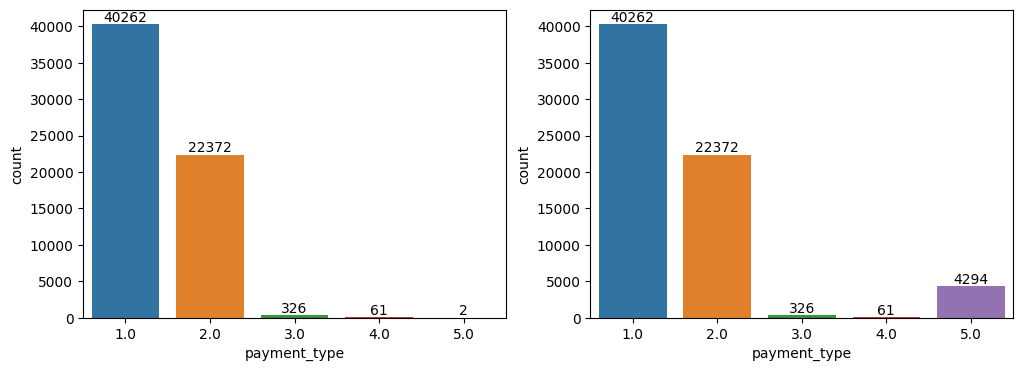

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = sns.countplot(data=df_old, x='payment_type', ax=axes[0])
ax.bar_label(ax.containers[0])
ax = sns.countplot(data=pd.concat([df_notna, df_na], axis=0).sort_index(), x='payment_type', ax=axes[1])
ax.bar_label(ax.containers[0])
plt.show();

<u>**Insight**</u>
<br>Gambar di atas adalah perbedaan antara sebelum (kiri) dan sesudah (kanan) melakukan handling missing values pada payment_type. Pembayaran menggunakan credit card (payment_type = 1) dan cash (payment_type = 2) cenderung dominan. Semua missing values dikategorikan sebagai payment_type = 5 atau unknown.

### 2.6.5 Trip Type

Jenis perjalanan merupakan atribut yang cukup penting dalam analisis karena membedakan jenis pemanggilan taksi yang dilakukan secara langsung di jalan (street-hail) atau melalui pangkalan (dispatch). Missing values pada kolom trip_type akan dikategorikan sebagai trip_type baru yaitu 3: others.

In [54]:
df_notna.trip_type.fillna(3.0, inplace=True)
df_na.trip_type.fillna(3.0, inplace=True)

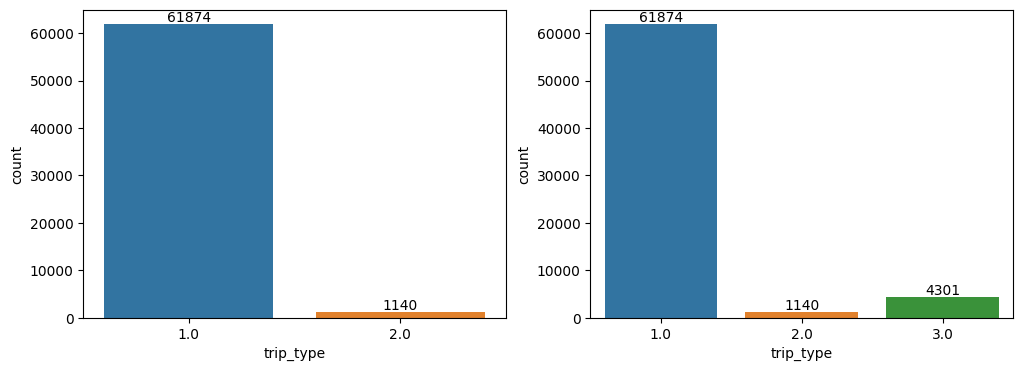

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = sns.countplot(data=df_old, x='trip_type', ax=axes[0])
ax.bar_label(ax.containers[0])
ax = sns.countplot(data=pd.concat([df_notna, df_na], axis=0).sort_index(), x='trip_type', ax=axes[1])
ax.bar_label(ax.containers[0])
plt.show();

<u>**Insight**</u>
<br>Gambar di atas adalah perbedaan antara sebelum (kiri) dan sesudah (kanan) melakukan handling missing values pada trip_type. Jenis perjalanan dengan pemesanan secara street-hail (trip_type = 1) sangat dominan. Semua missing values (termasuk ketika RatecodeID = 99) dikategorikan sebagai trip_type baru yaitu 3 atau unknown.

## **2.7 Handling Outliers**

### **2.7.1 Numerical, Continuous**

In [56]:
# menggabungkan data dengan dan tanpa missing values
df = pd.concat([df_notna, df_na], axis=0).sort_index(ascending=True)

''

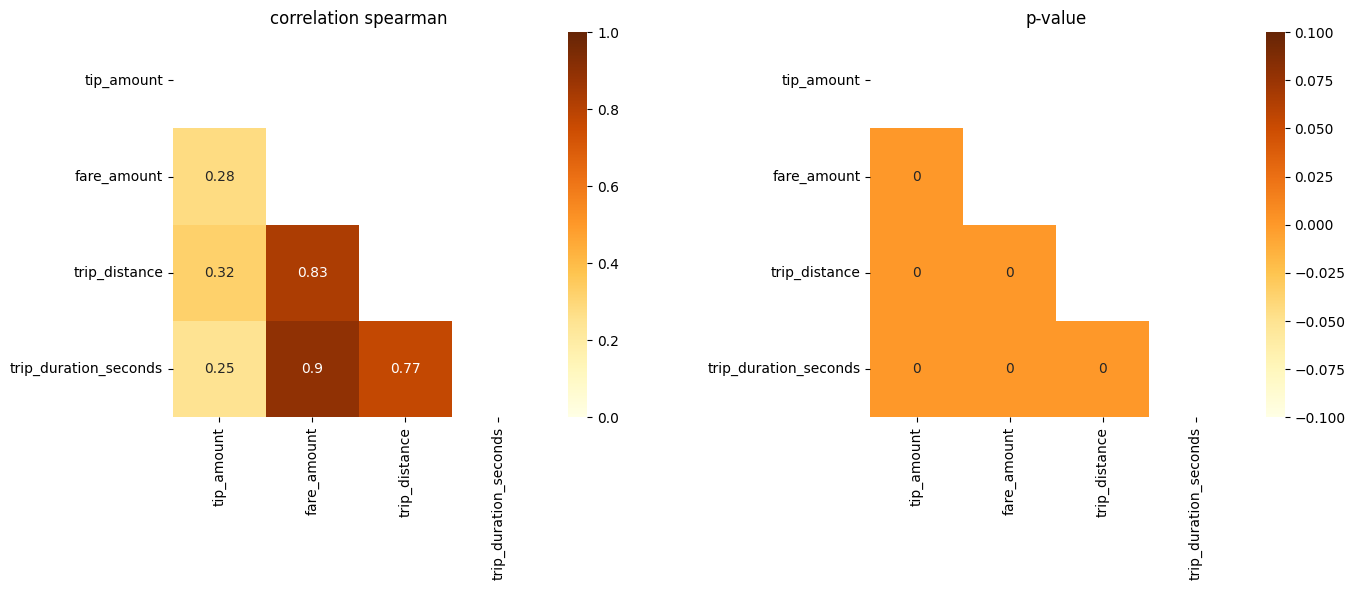

In [57]:
from scipy.stats import spearmanr
    
def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.1)

cols = ['tip_amount', 'fare_amount','trip_distance', 'trip_duration_seconds']

corr = df[cols].corr(method='spearman')
corr_mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=corr_mask, vmin=0, vmax=1, annot=True, cmap="YlOrBr", ax=ax[0])

sig = df[cols].corr(method=spearmanr_pval)
sig_mask = np.triu(np.ones_like(sig, dtype=bool))
sns.heatmap(sig, mask=sig_mask, annot=True, cmap="YlOrBr", ax=ax[1])

ax[0].set_title(r'correlation spearman')
ax[1].set_title(r'p-value')
;


In [58]:
df_old = df.copy()

In [59]:
# longest distance between two arbitrary points in NYC & Google Maps
df.trip_distance = df.trip_distance.mask(df.trip_distance > 50)

# maksimal trip_speed untuk durasi lebih dari 2 jam adalah 11mph, kurang logis secara domain knowledge
df.trip_duration_seconds = df.trip_duration_seconds.mask(df.trip_duration_seconds > 2*3600)

# batas maksimal fare amount adalah maksimal tarif ke airport
df.fare_amount = df.fare_amount.mask(df.fare_amount > df[df.RatecodeID.isin([2,3])].fare_amount.max())

# batas maksimal tip adalah 2 kali fare_amount
df.tip_amount = df.tip_amount.mask((df.tip_amount > 2*df.fare_amount), 2*df.fare_amount)

In [60]:
idx_na = df[df.isna().values].index
idx_notna = df.index.difference(idx_na)

In [61]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
cols = ['tip_amount', 'fare_amount','trip_distance', 'trip_duration_seconds']
df[cols] = imp.fit_transform(df[cols])

In [62]:
from scipy.stats import ks_2samp

stats, pvalue = ks_2samp(df_old.loc[idx_notna].trip_distance, df.trip_distance, alternative='two-sided')
print('p-value:', pvalue/2)

stats, pvalue = ks_2samp(df_old.loc[idx_notna].trip_duration_seconds, df.trip_duration_seconds, alternative='two-sided')
print('p-value:', pvalue/2)

stats, pvalue = ks_2samp(df_old.loc[idx_notna].fare_amount, df.fare_amount, alternative='two-sided')
print('p-value:', pvalue/2)

p-value: 0.5
p-value: 0.5
p-value: 0.5


In [63]:
def distboxplot(data, bins, xticks, xlim, xlabel, unit, column=None):
    fig, axes = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=(12,8),
        constrained_layout=True, 
        gridspec_kw={'height_ratios':[6,3]},
        sharex=True
    )
    sns.set_style("darkgrid")

    if column:
        sns.histplot(data=data, x=column, bins=bins, kde=True, ax=axes[0])
        axes[1].boxplot(data=data, x=column, patch_artist=True, meanline=True, showmeans=True, vert=False)
        # calculate central tendencies
        mean = data[column].mean()
        median = data[column].median()
        mad = abs(data[column] - data[column].median()).median()
    else:
        sns.histplot(data=data, bins=bins, kde=True, ax=axes[0])
        axes[1].boxplot(data, patch_artist=True, meanline=True, showmeans=True, vert=False)
        # calculate central tendencies
        mean = data.mean()
        median = data.median()
        mad = abs(data - data.median()).median()
    
    # create tendencies measurement lines
    axes[0].axvline(x=mean, color="limegreen", linestyle="--", label=f"mean: {mean:.2f} {unit}")
    axes[0].axvline(x=median, color="orange", linestyle="-", label=f"median: {median:.2f} {unit}")
    axes[0].axvline(x=median + mad, color="gold", linestyle="--", label=f"mad: {mad:.2f} {unit}")
    axes[0].axvline(x=median - mad, color="gold", linestyle="--")
    kde_x_0, kde_y_0 = axes[0].lines[0].get_data()
    axes[0].fill_between(
        kde_x_0, 
        kde_y_0, 
        where=(kde_x_0 > median - mad) & (kde_x_0 < median + mad), 
        color='gold', 
        alpha=0.2
    )

    axes[0].legend(prop={'size': 18})
    axes[0].set_xlim(xlim[0], xlim[1])

    axes[1].set_xlabel(xlabel, labelpad=15, fontsize=18)
    axes[1].set_xticks(xticks)
    axes[0].set_ylabel("Count", labelpad=15, fontsize=18)

    axes[0].tick_params(axis='both', labelsize=14)
    axes[1].tick_params(axis='x', labelsize=14)
    axes[1].set(yticklabels=[])

    plt.show();

In [64]:
df.insert(loc=16, column='fees', value=df['extra'] + df['mta_tax'] + df['tolls_amount'] + df['improvement_surcharge'] + df['congestion_surcharge'])
df['total_amount'] = df['fare_amount'] + df['fees'] + df['tip_amount']

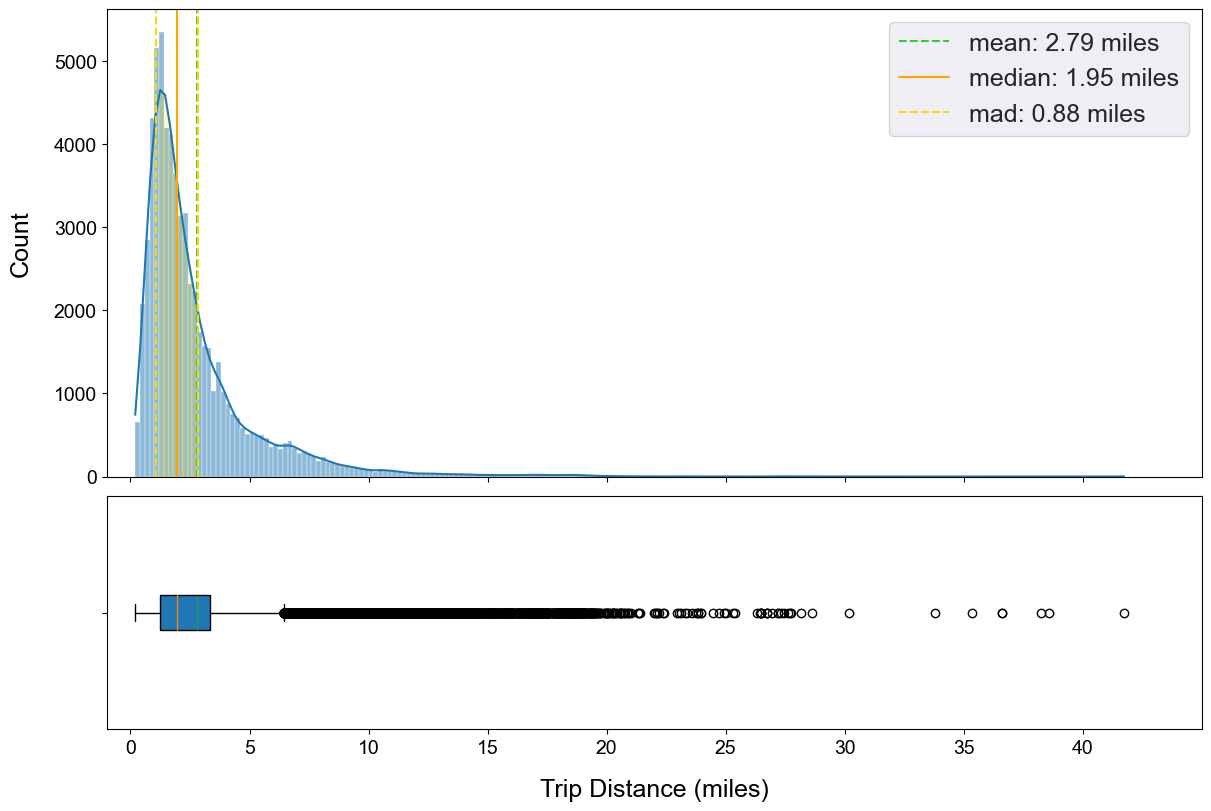

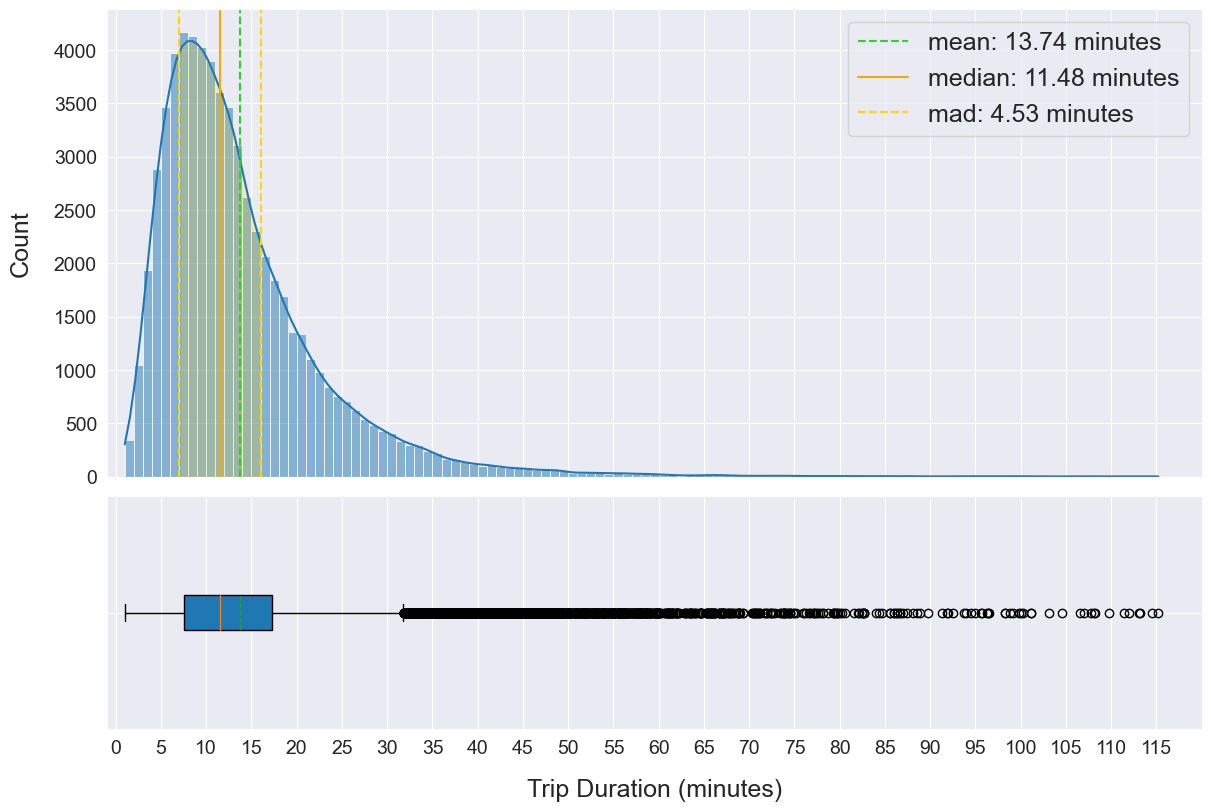

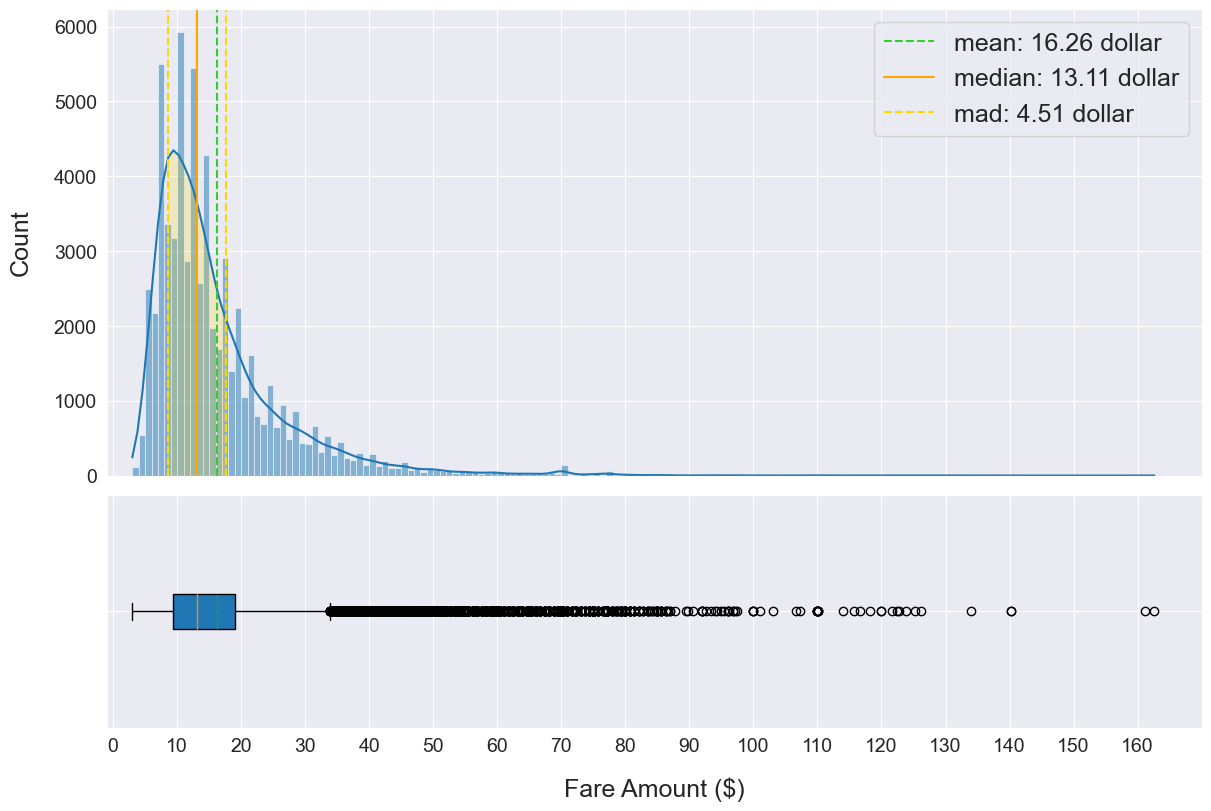

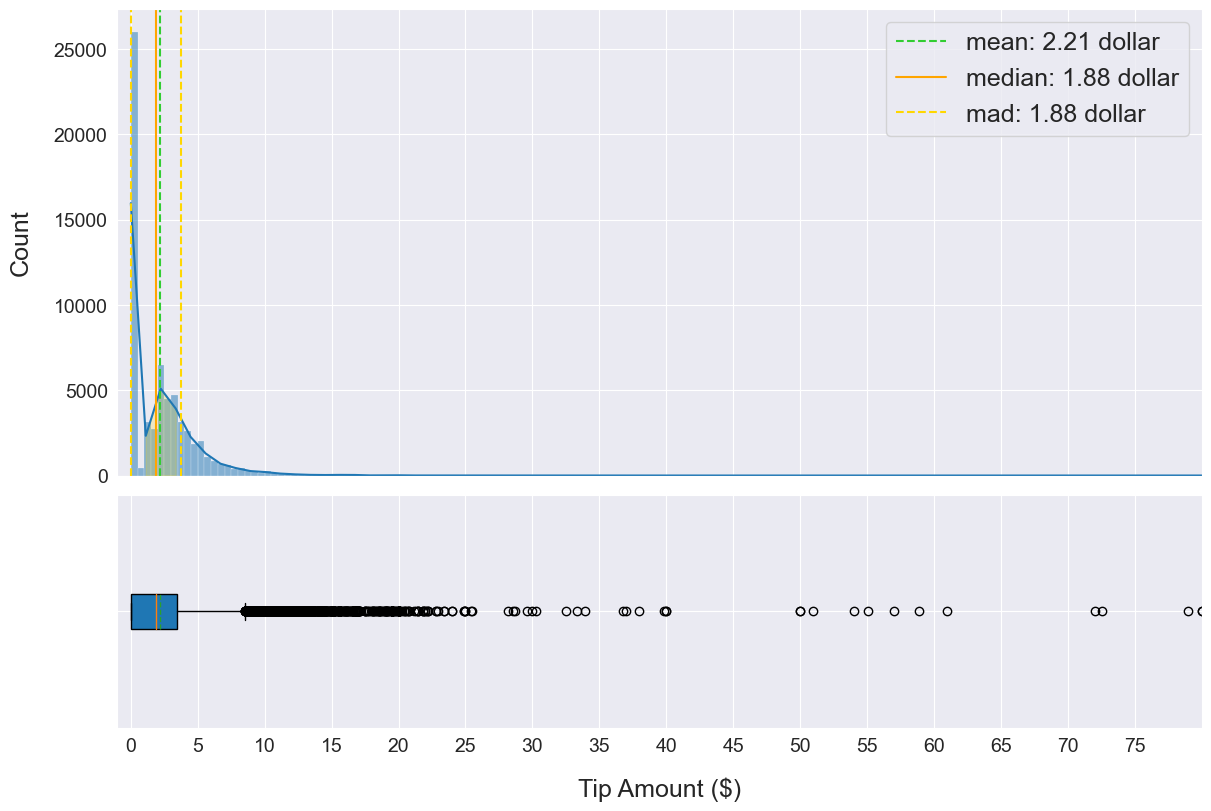

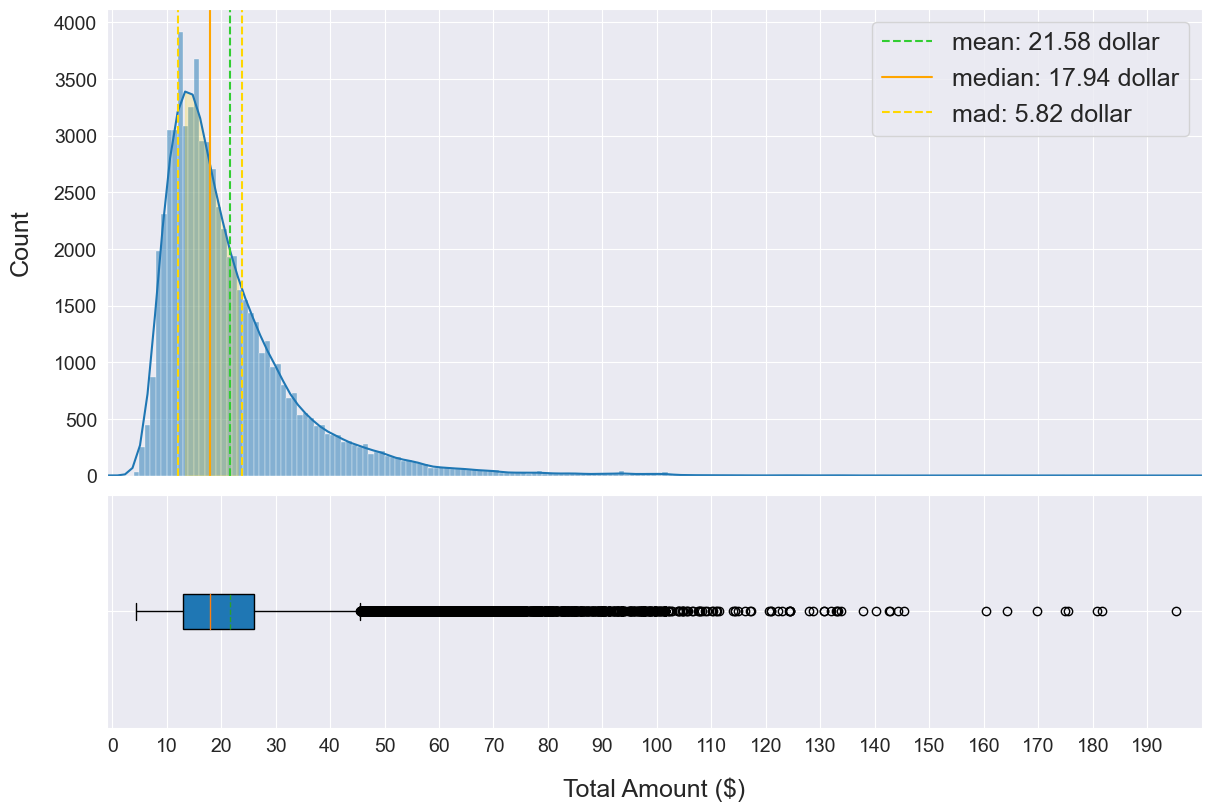

In [65]:
# limitasi analisis: >=0.2mil & >=60s & >= 3$
data = df_old[(df_old.trip_distance.between(0.2,50)) & (df_old.trip_duration_seconds.between(60,7200)) & (df_old.fare_amount.between(3,df[df.RatecodeID.isin([2,3])].fare_amount.max()))]

distboxplot(data=data, column='trip_distance', bins=np.arange(0,50,0.2),
            xticks=np.arange(0,45,5), xlim=[-1,45], xlabel='Trip Distance (miles)', unit='miles')
distboxplot(data=data.trip_duration_seconds.apply(lambda x: x/60), bins=np.arange(0,120,1),
            xticks=np.arange(0,120,5), xlim=[-1,120], xlabel='Trip Duration (minutes)', unit='minutes')
distboxplot(data=data, column='fare_amount', bins=np.arange(0,170,1),
            xticks=np.arange(0,170,10), xlim=[-1,170], xlabel='Fare Amount ($)', unit='dollar')
distboxplot(data=data, column='tip_amount', bins=np.arange(0,80,0.5),
            xticks=np.arange(0,80,5), xlim=[-1,80], xlabel='Tip Amount ($)', unit='dollar')
distboxplot(data=data, column='total_amount', bins=np.arange(0,200,1),
            xticks=np.arange(0,200,10), xlim=[-1,200], xlabel='Total Amount ($)', unit='dollar')

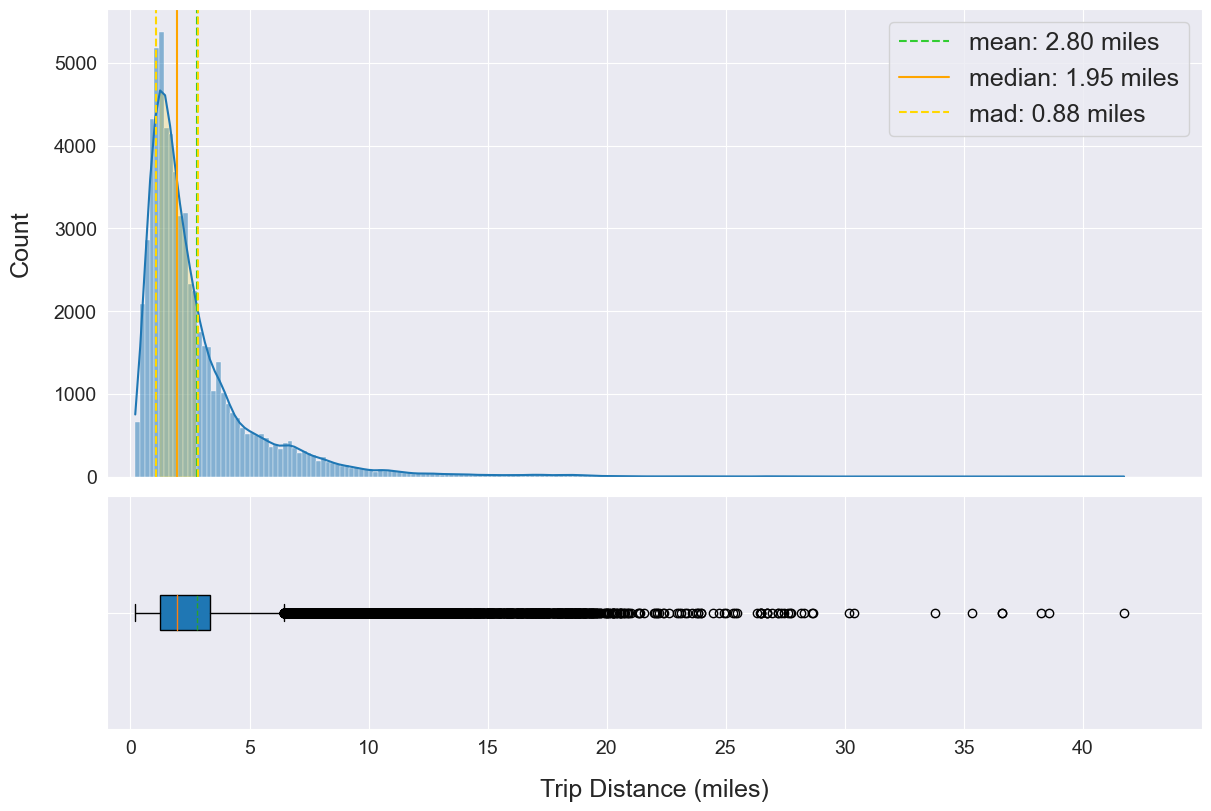

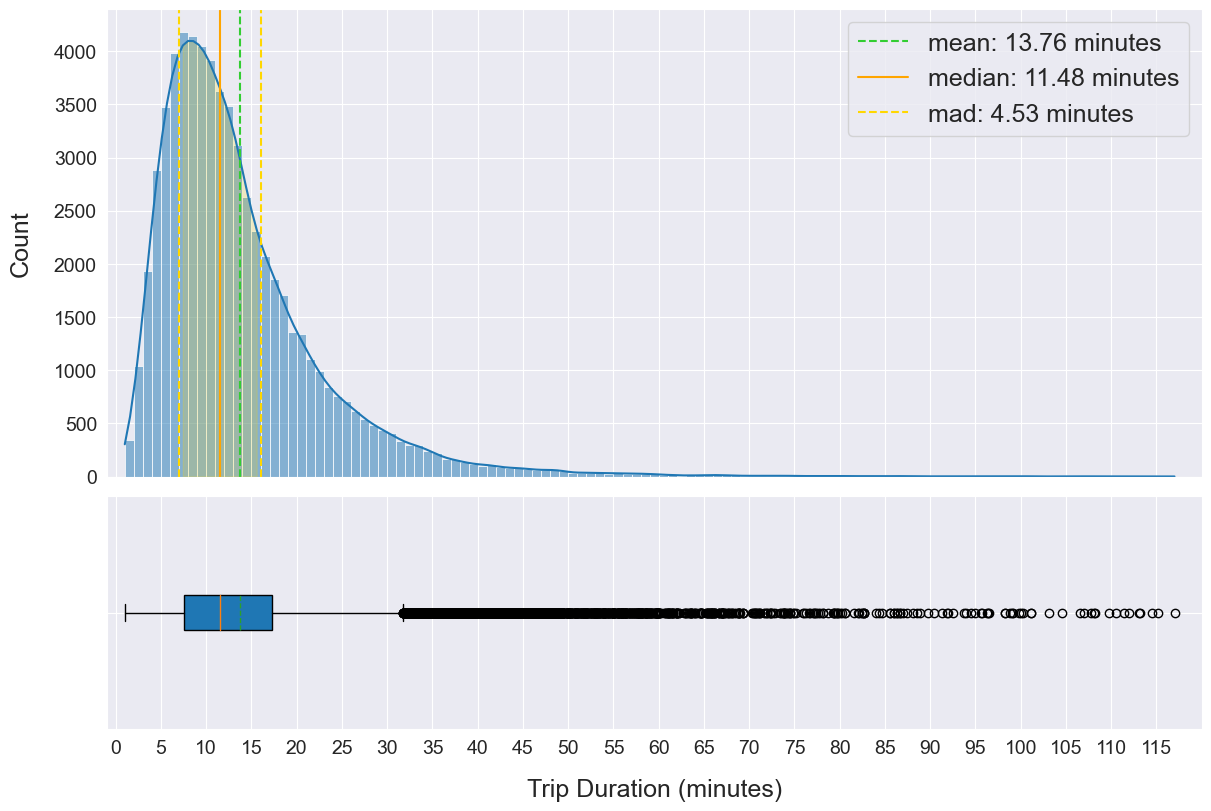

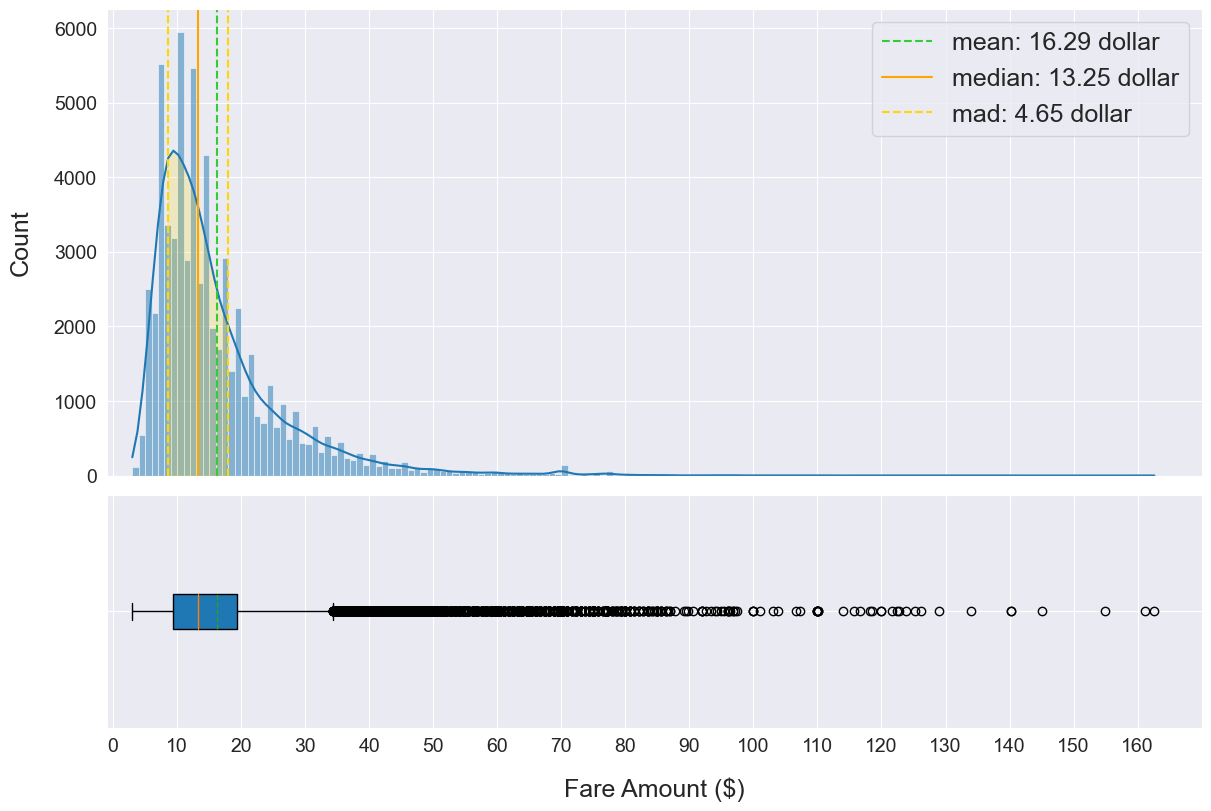

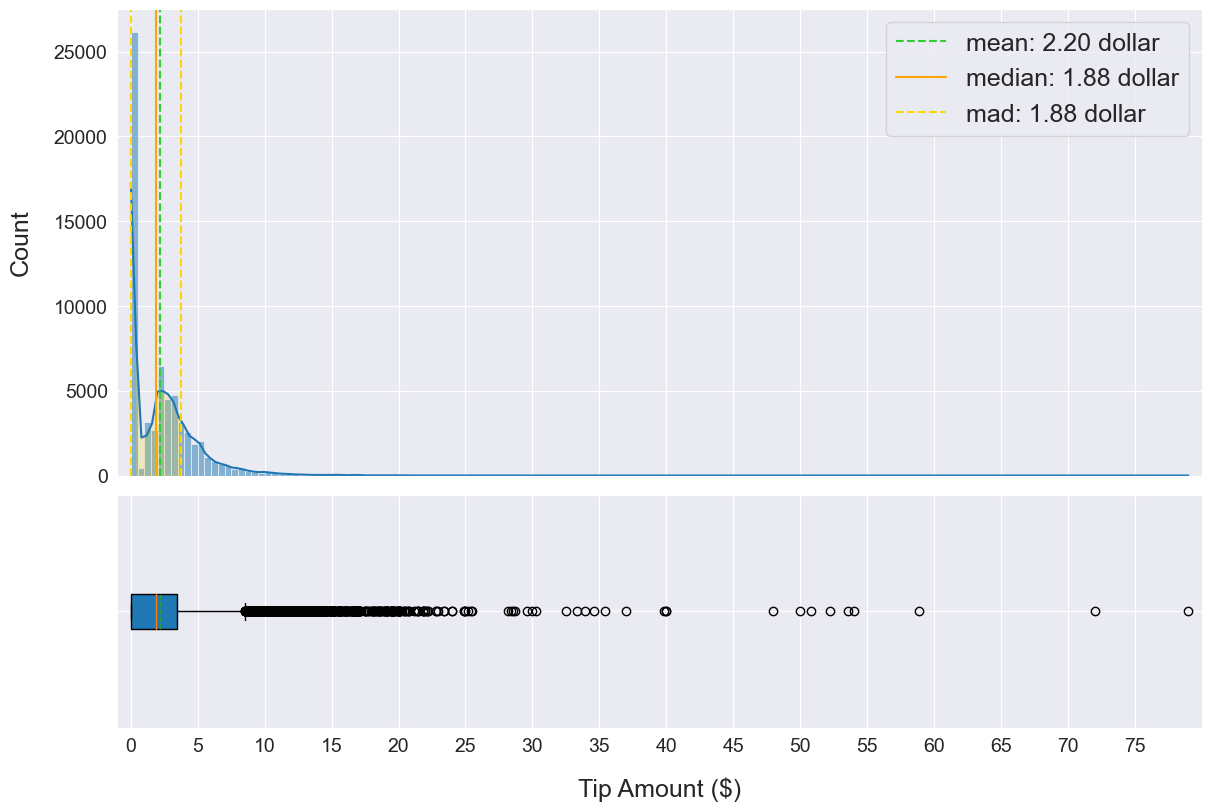

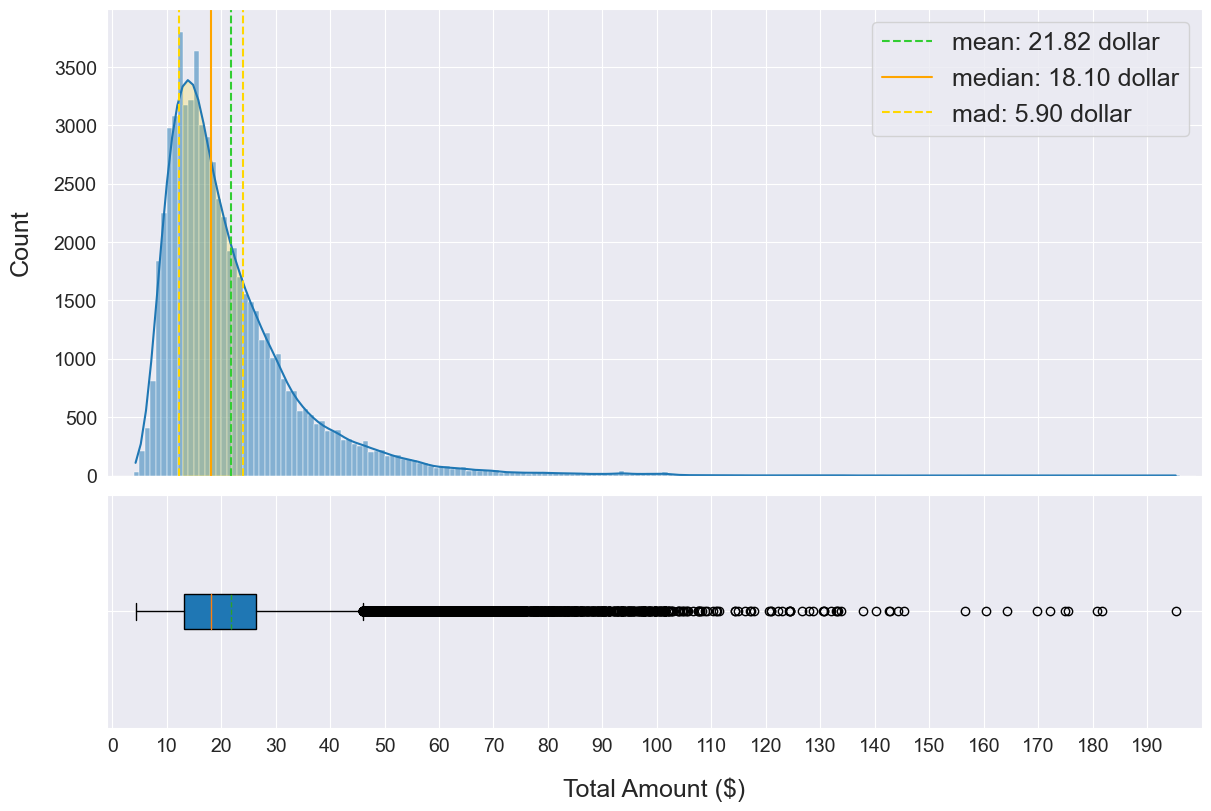

In [66]:
# limitasi analisis: >=0.2mil & >=60s & >= 3$
data = df[(df.trip_distance >= 0.2) & (df.trip_duration_seconds >= 60) & (df.fare_amount >= 3)]

distboxplot(data=data, column='trip_distance', bins=np.arange(0,50,0.2),
            xticks=np.arange(0,45,5), xlim=[-1,45], xlabel='Trip Distance (miles)', unit='miles')
distboxplot(data=data.trip_duration_seconds.apply(lambda x: x/60), bins=np.arange(0,120,1),
            xticks=np.arange(0,120,5), xlim=[-1,120], xlabel='Trip Duration (minutes)', unit='minutes')
distboxplot(data=data, column='fare_amount', bins=np.arange(0,170,1),
            xticks=np.arange(0,170,10), xlim=[-1,170], xlabel='Fare Amount ($)', unit='dollar')
distboxplot(data=data, column='tip_amount', bins=np.arange(0,80,0.5),
            xticks=np.arange(0,80,5), xlim=[-1,80], xlabel='Tip Amount ($)', unit='dollar')
distboxplot(data=data, column='total_amount', bins=np.arange(0,200,1),
            xticks=np.arange(0,200,10), xlim=[-1,200], xlabel='Total Amount ($)', unit='dollar')

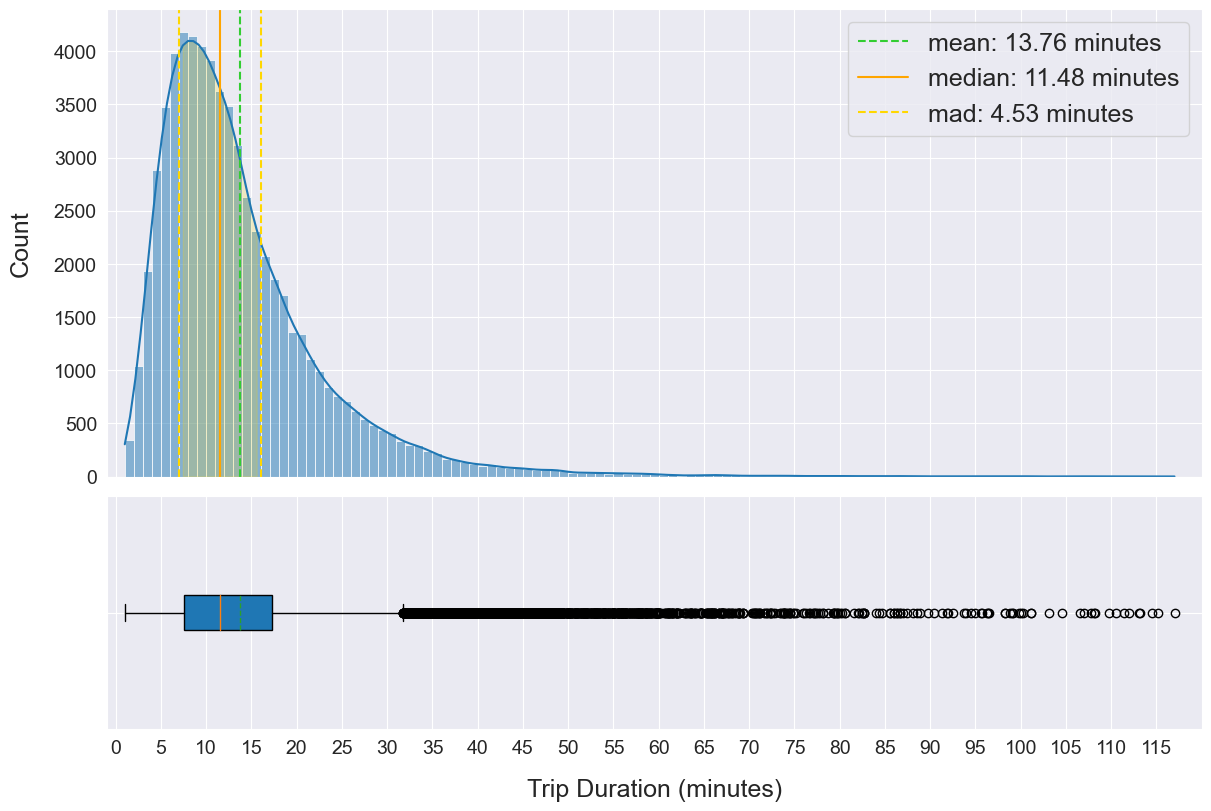

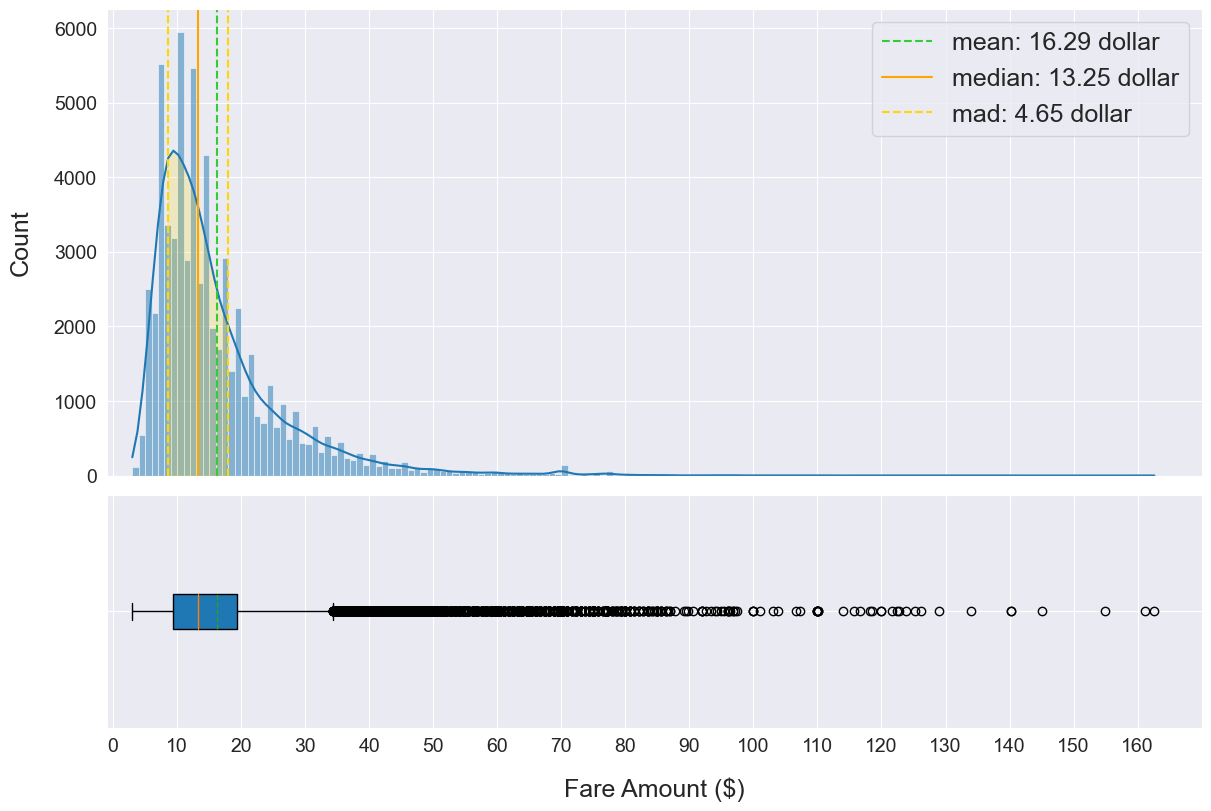

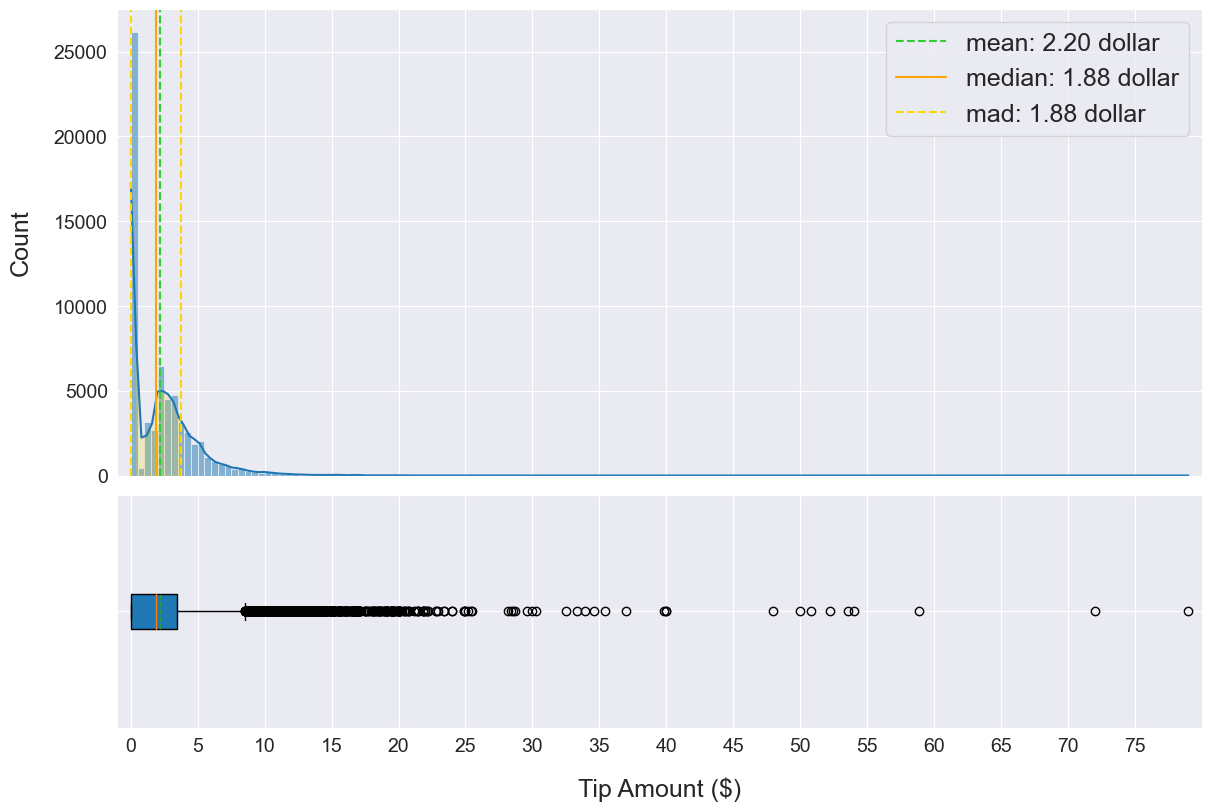

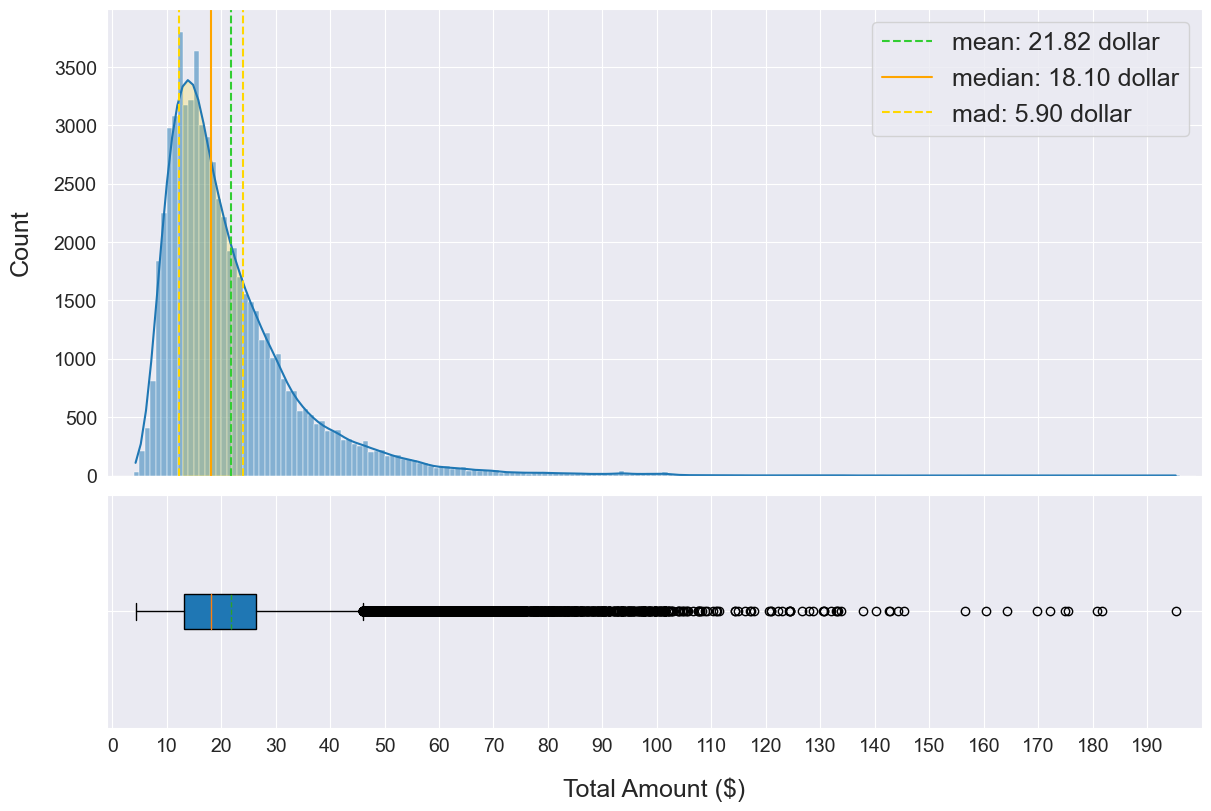

In [67]:
distboxplot(data=data.trip_duration_seconds.apply(lambda x: x/60), bins=np.arange(0,120,1),
            xticks=np.arange(0,120,5), xlim=[-1,120], xlabel='Trip Duration (minutes)', unit='minutes')
distboxplot(data=data, column='fare_amount', bins=np.arange(0,170,1),
            xticks=np.arange(0,170,10), xlim=[-1,170], xlabel='Fare Amount ($)', unit='dollar')
distboxplot(data=data, column='tip_amount', bins=np.arange(0,80,0.5),
            xticks=np.arange(0,80,5), xlim=[-1,80], xlabel='Tip Amount ($)', unit='dollar')
distboxplot(data=data, column='total_amount', bins=np.arange(0,200,1),
            xticks=np.arange(0,200,10), xlim=[-1,200], xlabel='Total Amount ($)', unit='dollar')

In [68]:
from datetime import timedelta
df['dropoff_datetime'] = (df.pickup_datetime + df.trip_duration_seconds.apply(lambda x: timedelta(seconds=x))).astype('datetime64[s]')

### **2.7.2 Numerical, Discrete**

In [69]:
df['rate_category'] = np.where(df.RatecodeID == 1, 'standard', 'others').astype('object')
df['passenger_category'] = np.where(df.passenger_count == 1, 'single', 'multiple').astype('object')
df['congestion_category'] = np.where(df.congestion_surcharge == 2.75, 'yes', 'no').astype('object')
df['payment_category'] = np.where(df.payment_type == 1, 'card', np.where(df.payment_type == 2, 'cash', 'others')).astype('object')
df['trip_category'] = np.where(df.trip_type == 1, 'street-hail', np.where(df.trip_type == 2, 'dispatch', 'unknown')).astype('object')

''

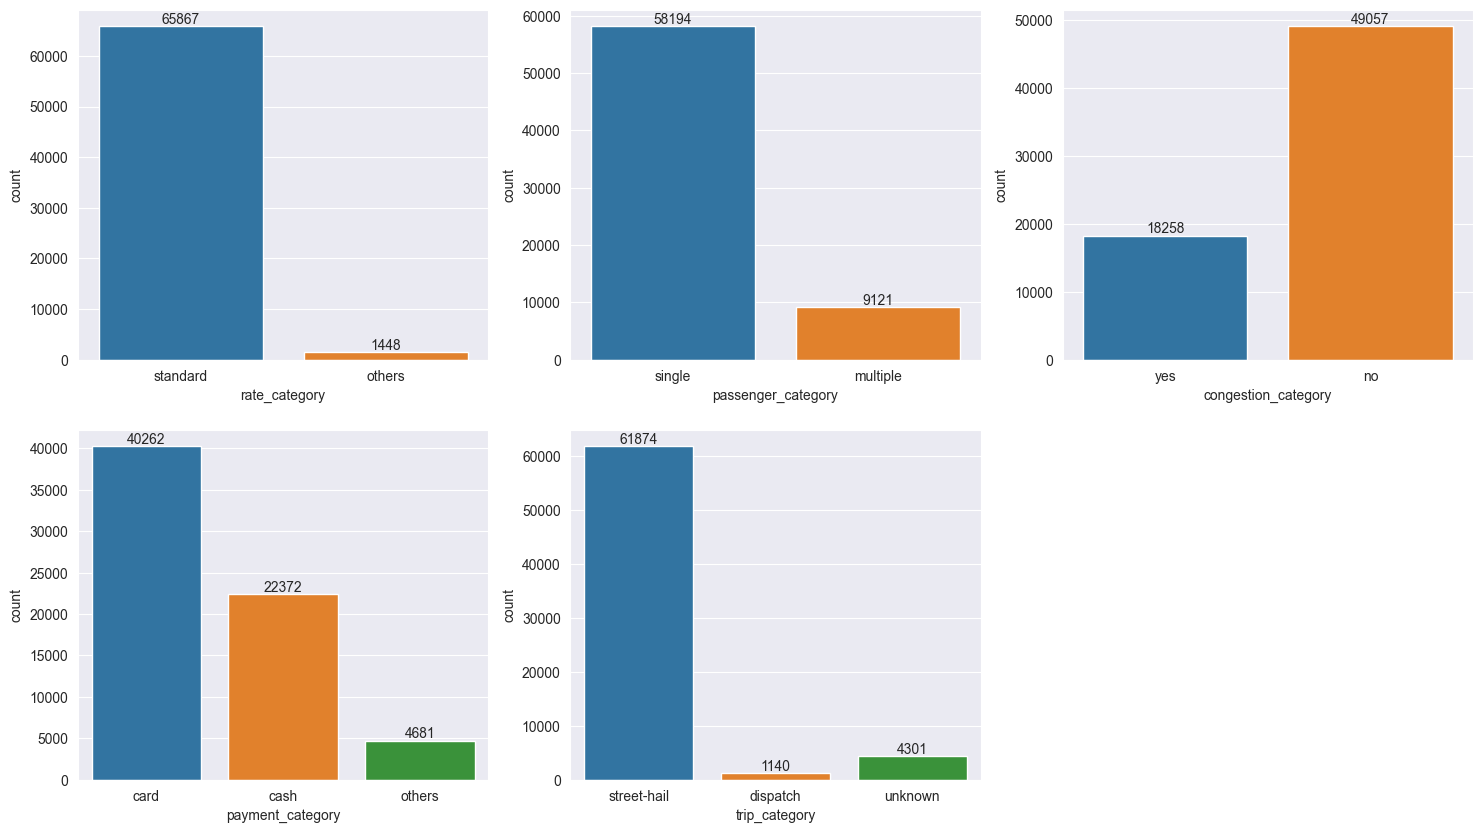

In [70]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
ax = sns.countplot(data=df, x='rate_category', ax=axes[0][0])
ax.bar_label(ax.containers[0])
ax = sns.countplot(data=df, x='passenger_category', ax=axes[0][1])
ax.bar_label(ax.containers[0])
ax = sns.countplot(data=df, x='congestion_category', ax=axes[0][2])
ax.bar_label(ax.containers[0])
ax = sns.countplot(data=df, x='payment_category', ax=axes[1][0])
ax.bar_label(ax.containers[0])
ax = sns.countplot(data=df, x='trip_category', ax=axes[1][1])
ax.bar_label(ax.containers[0])
axes[1][2].axis('off')
;

In [71]:
skim_dtype(df)

rows, columns: 67315, 28


,attribute,data_type,n_unique,sample_unique
0,pickup_datetime,datetime64[s],65897,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-0..."
1,dropoff_datetime,datetime64[s],65879,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-0..."
2,trip_duration_seconds,float64,3600,"[661.0, 406.0, 380.0, 349.0, 358.0, 1053.0, 1045.0, 777.0, 297.0, 1390.0, 1531.0, 505.0, 1139.0, 694.0, 2314.0, 1129.0, 532.0, 2544.0, 677.0, 433.0, 245.0, 250.0, 563.0, 274.0, 871.0, 1013.0, 723...."
3,RatecodeID,object,5,"[1, 5, 2, 99, 3]"
4,passenger_count,object,6,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0]"
5,trip_distance,float64,1800,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1.11, 4.22, 4.8, 1.99, 7.08, 3.23, 5.91, 11.3, 8.28, 2.02, 0.96, 0.53, 1.51, 0.88, 2.48, 3.53, 2.25, 4.29, 2.53, 1.7, 6.78, 1.39, 1.31, 6.7, 3.52, 1.74..."
6,fare_amount,float64,2474,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, 24.7, 26.8, 11.4, 30.3, 35.9, 32.5, 15.0, 44.3, 12.8, 8.6, 5.8, 16.3, 19.8, 18.4, 13.5, 8.0, 60.0, 7.9, 10.0, 3.0, 47.1, 5.5, 17.0, 75.0, 15.6, 47.8, ..."
7,extra,float64,12,"[1.0, 0.5, 3.75, 0.0, 3.25, 6.0, 5.0, 2.75, 5.5, 2.5, 5.25, 7.5]"
8,mta_tax,float64,4,"[0.5, 1.5, 0.0, 1.0]"
9,tolls_amount,float64,25,"[0.0, 6.55, 4.0, 9.0, 13.75, 3.0, 2.45, 7.0, 13.1, 11.75, 18.3, 20.5, 12.75, 22.75, 25.5, 36.05, 19.3, 14.75, 21.3, 6.25, 9.55, 8.0, 5.09, 6.75, 20.0]"


In [72]:
df.trip_duration_seconds = df.trip_duration_seconds.astype('int64')
df.trip_distance = round(df.trip_distance, 2)
df.total_amount = round(df.total_amount, 2)
df[['passenger_count', 'payment_type', 'trip_type']] = df[['passenger_count', 'payment_type', 'trip_type']].astype('int64').astype('object')
df[['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge']] = df[['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge']].astype('float64').astype('object')

In [73]:
skim_dtype(df)

rows, columns: 67315, 28


,attribute,data_type,n_unique,sample_unique
0,pickup_datetime,datetime64[s],65897,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-0..."
1,dropoff_datetime,datetime64[s],65879,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-0..."
2,trip_duration_seconds,int64,3345,"[661, 406, 380, 349, 358, 1053, 1045, 777, 297, 1390, 1531, 505, 1139, 694, 2314, 1129, 532, 2544, 677, 433, 245, 250, 563, 274, 871, 1013, 723, 1108, 481, 597, 484, 1414, 249, 507, 5, 1095, 598, ..."
3,RatecodeID,object,5,"[1, 5, 2, 99, 3]"
4,passenger_count,object,6,"[1, 2, 4, 3, 6, 5]"
5,trip_distance,float64,1763,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1.11, 4.22, 4.8, 1.99, 7.08, 3.23, 5.91, 11.3, 8.28, 2.02, 0.96, 0.53, 1.51, 0.88, 2.48, 3.53, 2.25, 4.29, 2.53, 1.7, 6.78, 1.39, 1.31, 6.7, 3.52, 1.74..."
6,fare_amount,float64,2474,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, 24.7, 26.8, 11.4, 30.3, 35.9, 32.5, 15.0, 44.3, 12.8, 8.6, 5.8, 16.3, 19.8, 18.4, 13.5, 8.0, 60.0, 7.9, 10.0, 3.0, 47.1, 5.5, 17.0, 75.0, 15.6, 47.8, ..."
7,extra,object,12,"[1.0, 0.5, 3.75, 0.0, 3.25, 6.0, 5.0, 2.75, 5.5, 2.5, 5.25, 7.5]"
8,mta_tax,object,4,"[0.5, 1.5, 0.0, 1.0]"
9,tolls_amount,float64,25,"[0.0, 6.55, 4.0, 9.0, 13.75, 3.0, 2.45, 7.0, 13.1, 11.75, 18.3, 20.5, 12.75, 22.75, 25.5, 36.05, 19.3, 14.75, 21.3, 6.25, 9.55, 8.0, 5.09, 6.75, 20.0]"


In [74]:
skim_null_values(df)

rows, columns: 67315, 28


,attribute,data_type,n_null_value,percent_null_value
0,pickup_datetime,datetime64[s],0,0.0
1,dropoff_datetime,datetime64[s],0,0.0
2,trip_duration_seconds,int64,0,0.0
3,RatecodeID,object,0,0.0
4,passenger_count,object,0,0.0
5,trip_distance,float64,0,0.0
6,fare_amount,float64,0,0.0
7,extra,object,0,0.0
8,mta_tax,object,0,0.0
9,tolls_amount,float64,0,0.0


In [75]:
df.columns = df.columns.str.lower()
df.rename(columns={'ratecodeid': 'ratecode_id'}, inplace=True)

In [76]:
df['pickup_hour'] = df.pickup_datetime.apply(lambda x: x.hour).astype('object')
df['pickup_day'] = df.pickup_datetime.apply(lambda x: x.strftime("%a")).astype('object')
df['trip_distance_category'] = np.where(df.trip_distance.between(0,5), 'short', 'long').astype('object')
df['trip_duration_category'] = np.where(df.trip_duration_seconds.between(0,900), 'short', 'long').astype('object')

In [77]:
df = df[['pickup_datetime', 'dropoff_datetime', 'pickup_hour', 'pickup_day',
         'trip_duration_seconds', 'trip_duration_category', 'trip_distance', 'trip_distance_category',
         'congestion_category', 'fare_amount', 'fees', 'tip_amount', 'total_amount',
         'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough', 'pickup_service_zone', 'dropoff_service_zone',
         'rate_category', 'passenger_category', 'payment_category', 'trip_category']]

In [78]:
display(df.describe(), df.describe(include='object'))

,pickup_datetime,dropoff_datetime,trip_duration_seconds,trip_distance,fare_amount,fees,tip_amount,total_amount
count,67315,67315,67315.000000,67315.000000,67315.000000,67315.000000,67315.000000,67315.000000
mean,2023-01-16 22:15:31,2023-01-16 22:29:16,824.358776,2.650632,16.370595,3.293729,2.123670,21.787994
min,2023-01-01 00:01:31,2023-01-01 00:13:26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-01-09 12:32:59,2023-01-09 12:41:38,437.000000,1.130000,9.300000,1.500000,0.000000,13.000000
50%,2023-01-17 08:47:46,2023-01-17 09:03:53,684.000000,1.860000,13.500000,2.500000,1.610000,18.040000
75%,2023-01-24 15:54:26,2023-01-24 16:08:18,1040.000000,3.210000,19.800000,4.250000,3.340000,26.400000
max,2023-01-31 23:58:23,2023-02-01 00:31:14,7138.000000,41.740000,162.600000,37.050000,79.000000,195.240000
std,NaN,NaN,599.392294,2.640338,11.314283,2.223937,2.746549,13.523942


,pickup_hour,pickup_day,trip_duration_category,trip_distance_category,congestion_category,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_service_zone,dropoff_service_zone,rate_category,passenger_category,payment_category,trip_category
count,67315,67315,67315,67315,67315,67315,67315,67315,67315,67315,67315,67315,67315,67315,67315
unique,24,7,2,2,2,221,245,5,6,3,4,2,2,3,3
top,18,Tue,short,short,no,East Harlem North,East Harlem South,Manhattan,Manhattan,Boro Zone,Boro Zone,standard,single,card,street-hail
freq,5185,11119,45399,58832,49057,13208,3505,39236,39540,63340,43392,65867,58194,40262,61874


In [79]:
df.sort_values(by='pickup_datetime', ascending=True, ignore_index=True, inplace=True)
display(df.index, df)

RangeIndex(start=0, stop=67315, step=1)

,pickup_datetime,dropoff_datetime,pickup_hour,pickup_day,trip_duration_seconds,trip_duration_category,trip_distance,trip_distance_category,congestion_category,fare_amount,fees,tip_amount,total_amount,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_service_zone,dropoff_service_zone,rate_category,passenger_category,payment_category,trip_category
0,2023-01-01 00:01:31,2023-01-01 00:16:02,0,Sun,871,short,2.48,short,no,16.30,2.50,3.76,22.56,Morningside Heights,Washington Heights South,Manhattan,Manhattan,Boro Zone,Boro Zone,standard,single,card,street-hail
1,2023-01-01 00:04:25,2023-01-01 00:17:50,0,Sun,805,short,2.80,short,no,16.30,2.50,2.80,21.60,Williamsburg (North Side),Long Island City/Queens Plaza,Brooklyn,Queens,Boro Zone,Boro Zone,standard,single,card,street-hail
2,2023-01-01 00:06:48,2023-01-01 01:08:47,0,Sun,3719,long,7.83,long,no,52.00,2.50,0.00,54.50,Jackson Heights,Sunnyside,Queens,Queens,Boro Zone,Boro Zone,standard,multiple,cash,street-hail
3,2023-01-01 00:08:05,2023-01-01 00:13:26,0,Sun,321,short,1.05,short,no,5.50,1.30,1.36,8.16,Central Harlem,East Harlem South,Manhattan,Manhattan,Boro Zone,Boro Zone,standard,multiple,card,street-hail
4,2023-01-01 00:08:43,2023-01-01 00:17:08,0,Sun,505,short,1.99,short,yes,11.40,5.25,3.33,19.98,East Harlem South,Lenox Hill East,Manhattan,Manhattan,Boro Zone,Yellow Zone,standard,single,card,street-hail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67310,2023-01-31 23:46:00,2023-02-01 00:02:00,23,Tue,960,long,3.44,short,no,16.53,1.00,3.51,21.04,DUMBO/Vinegar Hill,Bushwick South,Brooklyn,Brooklyn,Boro Zone,Boro Zone,standard,single,others,unknown
67311,2023-01-31 23:51:00,2023-02-01 00:07:00,23,Tue,960,long,5.82,long,yes,23.65,3.75,2.00,29.40,Williamsburg (South Side),Lenox Hill East,Brooklyn,Manhattan,Boro Zone,Yellow Zone,standard,single,others,unknown
67312,2023-01-31 23:53:41,2023-02-01 00:31:14,23,Tue,2253,long,6.44,long,no,38.00,2.50,0.00,40.50,Elmhurst,Elmhurst/Maspeth,Queens,Queens,Boro Zone,Boro Zone,standard,multiple,cash,street-hail
67313,2023-01-31 23:56:16,2023-02-01 00:03:16,23,Tue,420,short,1.16,short,no,8.60,2.50,2.22,13.32,Forest Hills,Rego Park,Queens,Queens,Boro Zone,Boro Zone,standard,single,card,street-hail


In [80]:
df.to_csv('../data/processed/clean_nyc_tlc_trip_record.csv', index=False)